# Update 01

## Violence non-violence detection

### Machine configuration

In [ ]:
!nvidia-smi

Wed Nov  6 07:09:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Installing YoloV8

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 19.7 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.1/112.6 GB disk)


### Importing necessary libraries

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

### Training with custom dataset

In [ ]:
!ls

runs  yolov8s.pt


In [ ]:
!mkdir -p /content/drive/MyDrive/thesis
%cd /content/drive/MyDrive/thesis

/content/drive/MyDrive/thesis


In [ ]:
%cd /content/drive/MyDrive/thesis
data_yaml_content = """
train: /path/to/train/images  # Update with the path to your training images
val: /path/to/val/images      # Update with the path to your validation images

nc: 2                         # Number of classes (for example, 'violence', 'non-violence')
names: ['violence', 'non-violence']  # Class names (update based on your dataset)
"""

with open('data.yaml', 'w') as file:
    file.write(data_yaml_content)


/content/drive/MyDrive/thesis


In [ ]:
%cd /content/drive/MyDrive/thesis/
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/thesis/Violence-1/data.yaml epochs=25 imgsz=416

/content/drive/MyDrive/thesis
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/thesis/Violence-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_c

### Traning result

#### Result data

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="02bqgGuhIgpP5PA95W0a")
project = rf.workspace("shah-xxxqs").project("violence-3h8pw")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Violence-1 in yolov8:: 100%|██████████| 5680/5680 [00:00<00:00, 7324.27it/s]


In [ ]:
import os

# Paths to the training and validation image directories
train_dir = '/content/drive/MyDrive/thesis/Violence-1/train/images'
val_dir = '/content/drive/MyDrive/thesis/Violence-1/valid/images'

print("Training images:", os.listdir(train_dir)[:5])  # Display first 5 training images
print("Validation images:", os.listdir(val_dir)[:5])  # Display first 5 validation images


Training images: ['V_311_F123_jpg.rf.c9dafeb374e2b6802919bc7d8533d852.jpg', 'V_340_F114_jpg.rf.c1e7f3290c35044bb525f4acd1760db4.jpg', 'V_629_F90_jpg.rf.f254fcce1a5c94a54c46c04fdd8913f9.jpg', 'V_753_F60_jpg.rf.b4c0b46b92a3a62aaf0f55e66af8a57a.jpg', 'V_520_F45_jpg.rf.8dd47ed72544c2625142e754b557f3b1.jpg']
Validation images: ['V_156_F39_jpg.rf.09f257f7a5e2b5da4c7e1da610ace426.jpg', 'V_646_F42_jpg.rf.0c829c372f885689c7663b000e33919d.jpg', 'V_633_F36_jpg.rf.e08dcd1822d554124e0094ec00d2443a.jpg', 'V_629_F81_jpg.rf.b03d40757ca01b32ea4179f32bff5251.jpg', 'V_646_F39_jpg.rf.ac0436daf43860613ce2a31c789ecc31.jpg']


In [ ]:
with open("data.yaml", "r") as file:
    print(file.read())



train: /path/to/train/images  # Update with the path to your training images
val: /path/to/val/images      # Update with the path to your validation images

nc: 2                         # Number of classes (for example, 'violence', 'non-violence')
names: ['violence', 'non-violence']  # Class names (update based on your dataset)



In [ ]:
!pwd

/content/drive/MyDrive/thesis


In [ ]:
!ls runs/detect/train/weights/

In [ ]:
!find /content/drive/MyDrive/thesis/runs/detect/ -name "results.csv"

/content/drive/MyDrive/thesis/runs/detect/train3/results.csv


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/thesis/runs/detect/train3/results.csv')
df

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,38.0527,1.57027,1.97100,1.53989,0.41897,0.44647,0.38670,0.16484,1.89160,3.33619,2.08997,0.000551,0.000551,0.000551
1,2,68.3202,1.65477,1.87703,1.62925,0.37364,0.35871,0.24920,0.09157,2.01272,3.41372,2.01067,0.001063,0.001063,0.001063
2,3,96.7142,1.69236,1.90955,1.66923,0.41790,0.47413,0.41057,0.17588,1.88161,2.15263,1.96444,0.001531,0.001531,0.001531
3,4,127.5690,1.66083,1.89570,1.64439,0.48512,0.55430,0.50230,0.23855,1.77593,1.89224,1.81756,0.001469,0.001469,0.001469
4,5,157.3800,1.62479,1.80043,1.61464,0.59755,0.53433,0.55513,0.25622,1.78333,1.86891,1.88090,0.001403,0.001403,0.001403
5,6,186.3150,1.55848,1.75955,1.57831,0.50463,0.52367,0.51914,0.26179,1.62622,1.70196,1.62734,0.001337,0.001337,0.001337
6,7,216.5000,1.54073,1.68883,1.57900,0.59669,0.55359,0.58560,0.30426,1.56411,1.57618,1.63518,0.001271,0.001271,0.001271
7,8,249.2190,1.49624,1.61148,1.53915,0.61826,0.60135,0.61269,0.30601,1.61940,1.59659,1.63825,0.001205,0.001205,0.001205
8,9,278.9590,1.47598,1.55661,1.50848,0.56981,0.56448,0.57373,0.29596,1.55146,1.51961,1.57155,0.001139,0.001139,0.001139
9,10,309.8540,1.46869,1.54221,1.52041,0.67655,0.65629,0.70247,0.38437,1.48707,1.35506,1.53454,0.001073,0.001073,0.001073


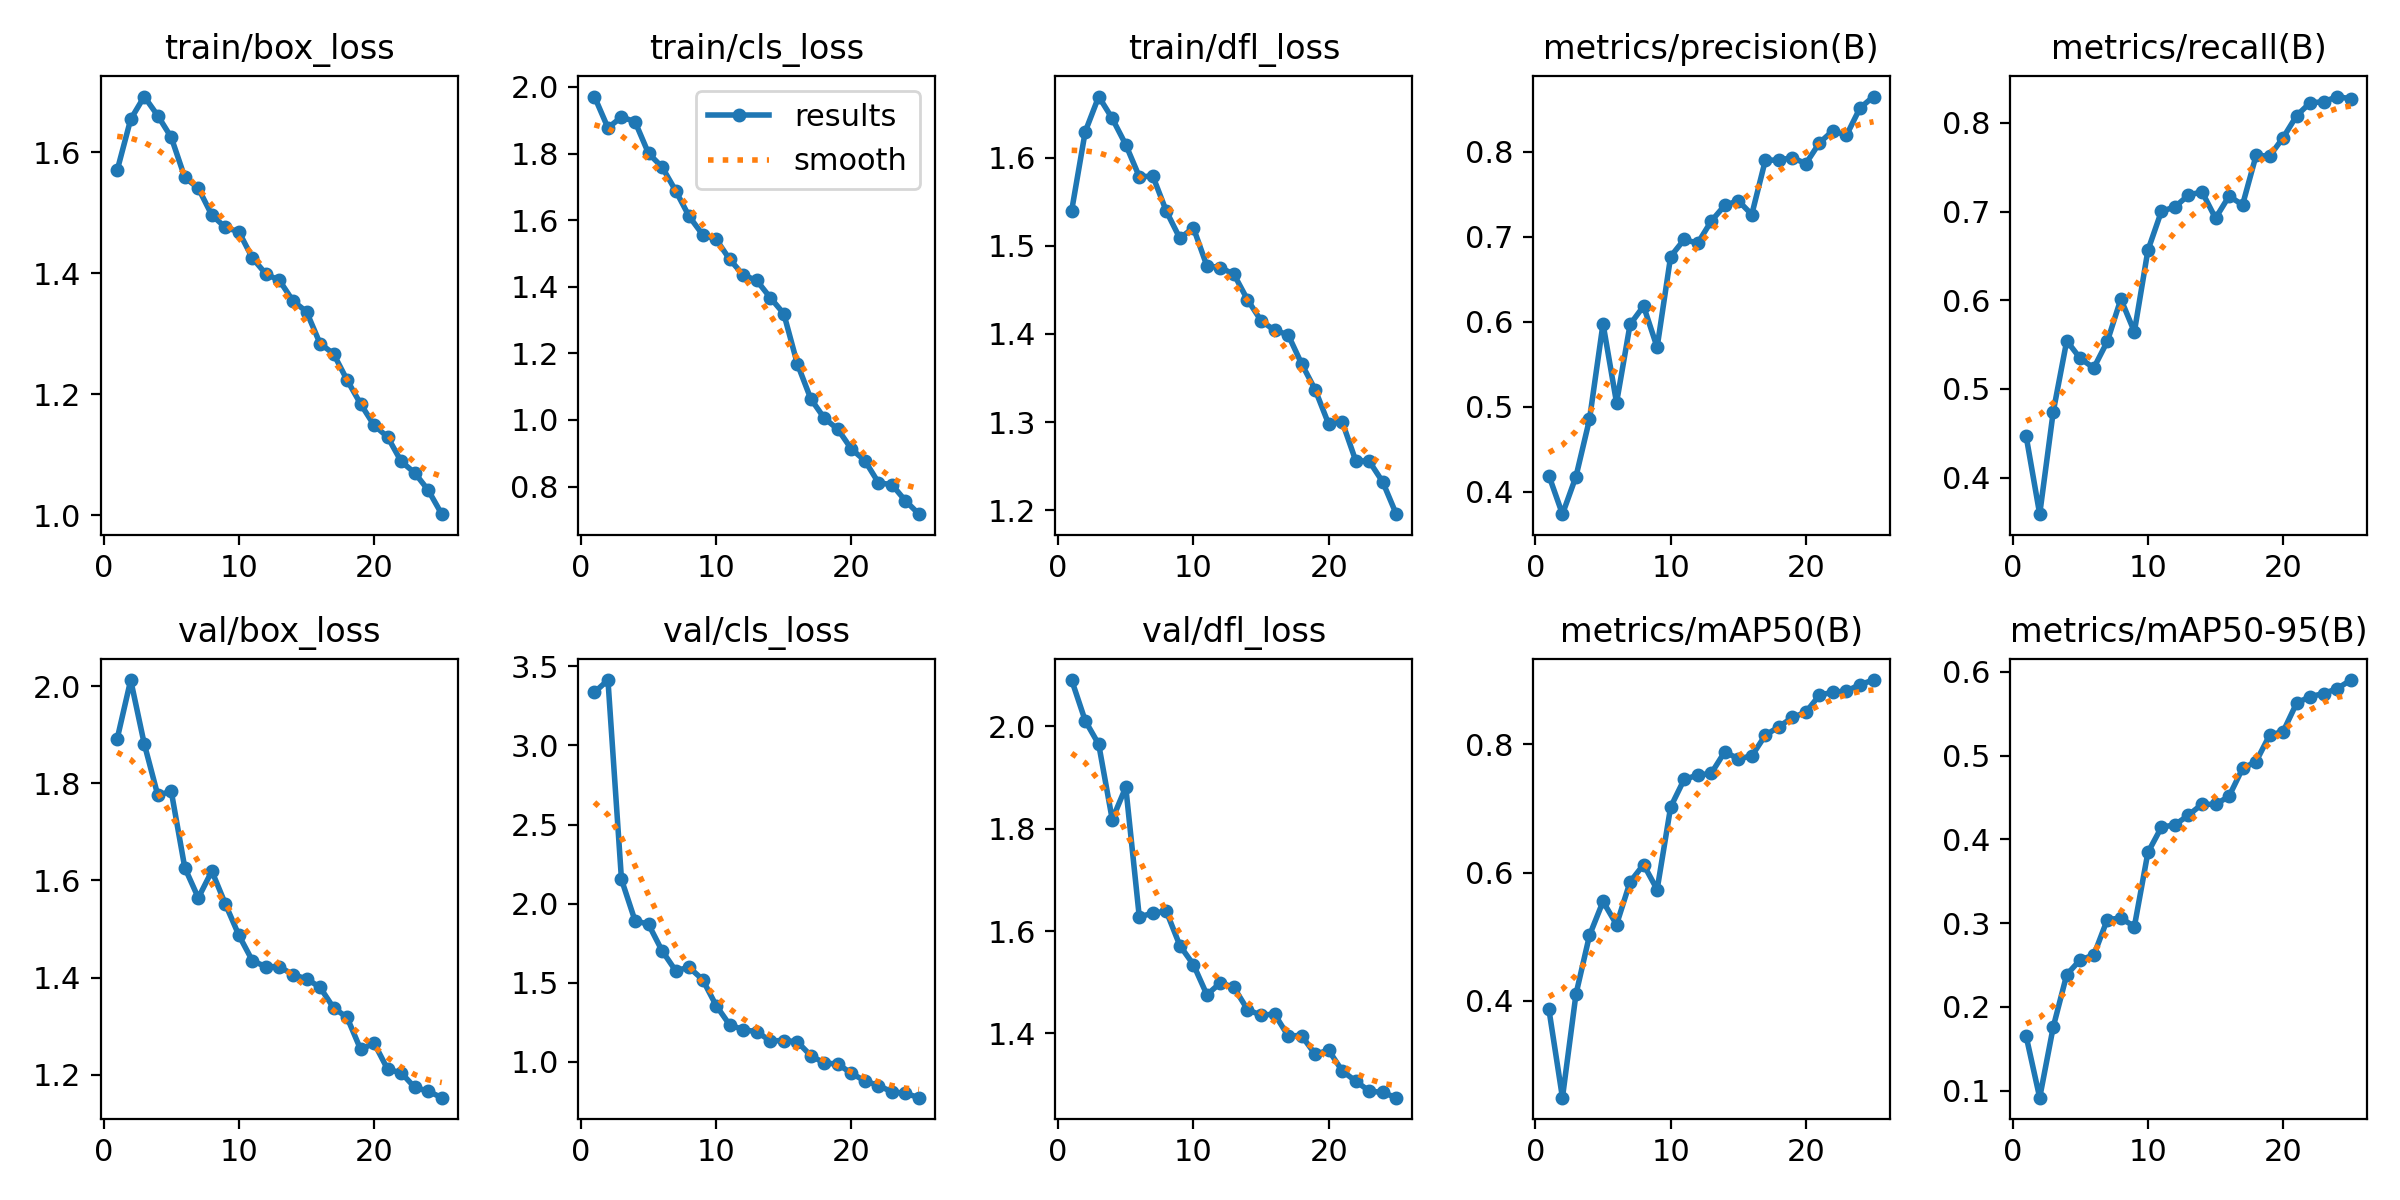

In [ ]:
Image(filename='/content/drive/MyDrive/thesis/runs/detect/train3/results.png', width=600)

#### Confusion matrix

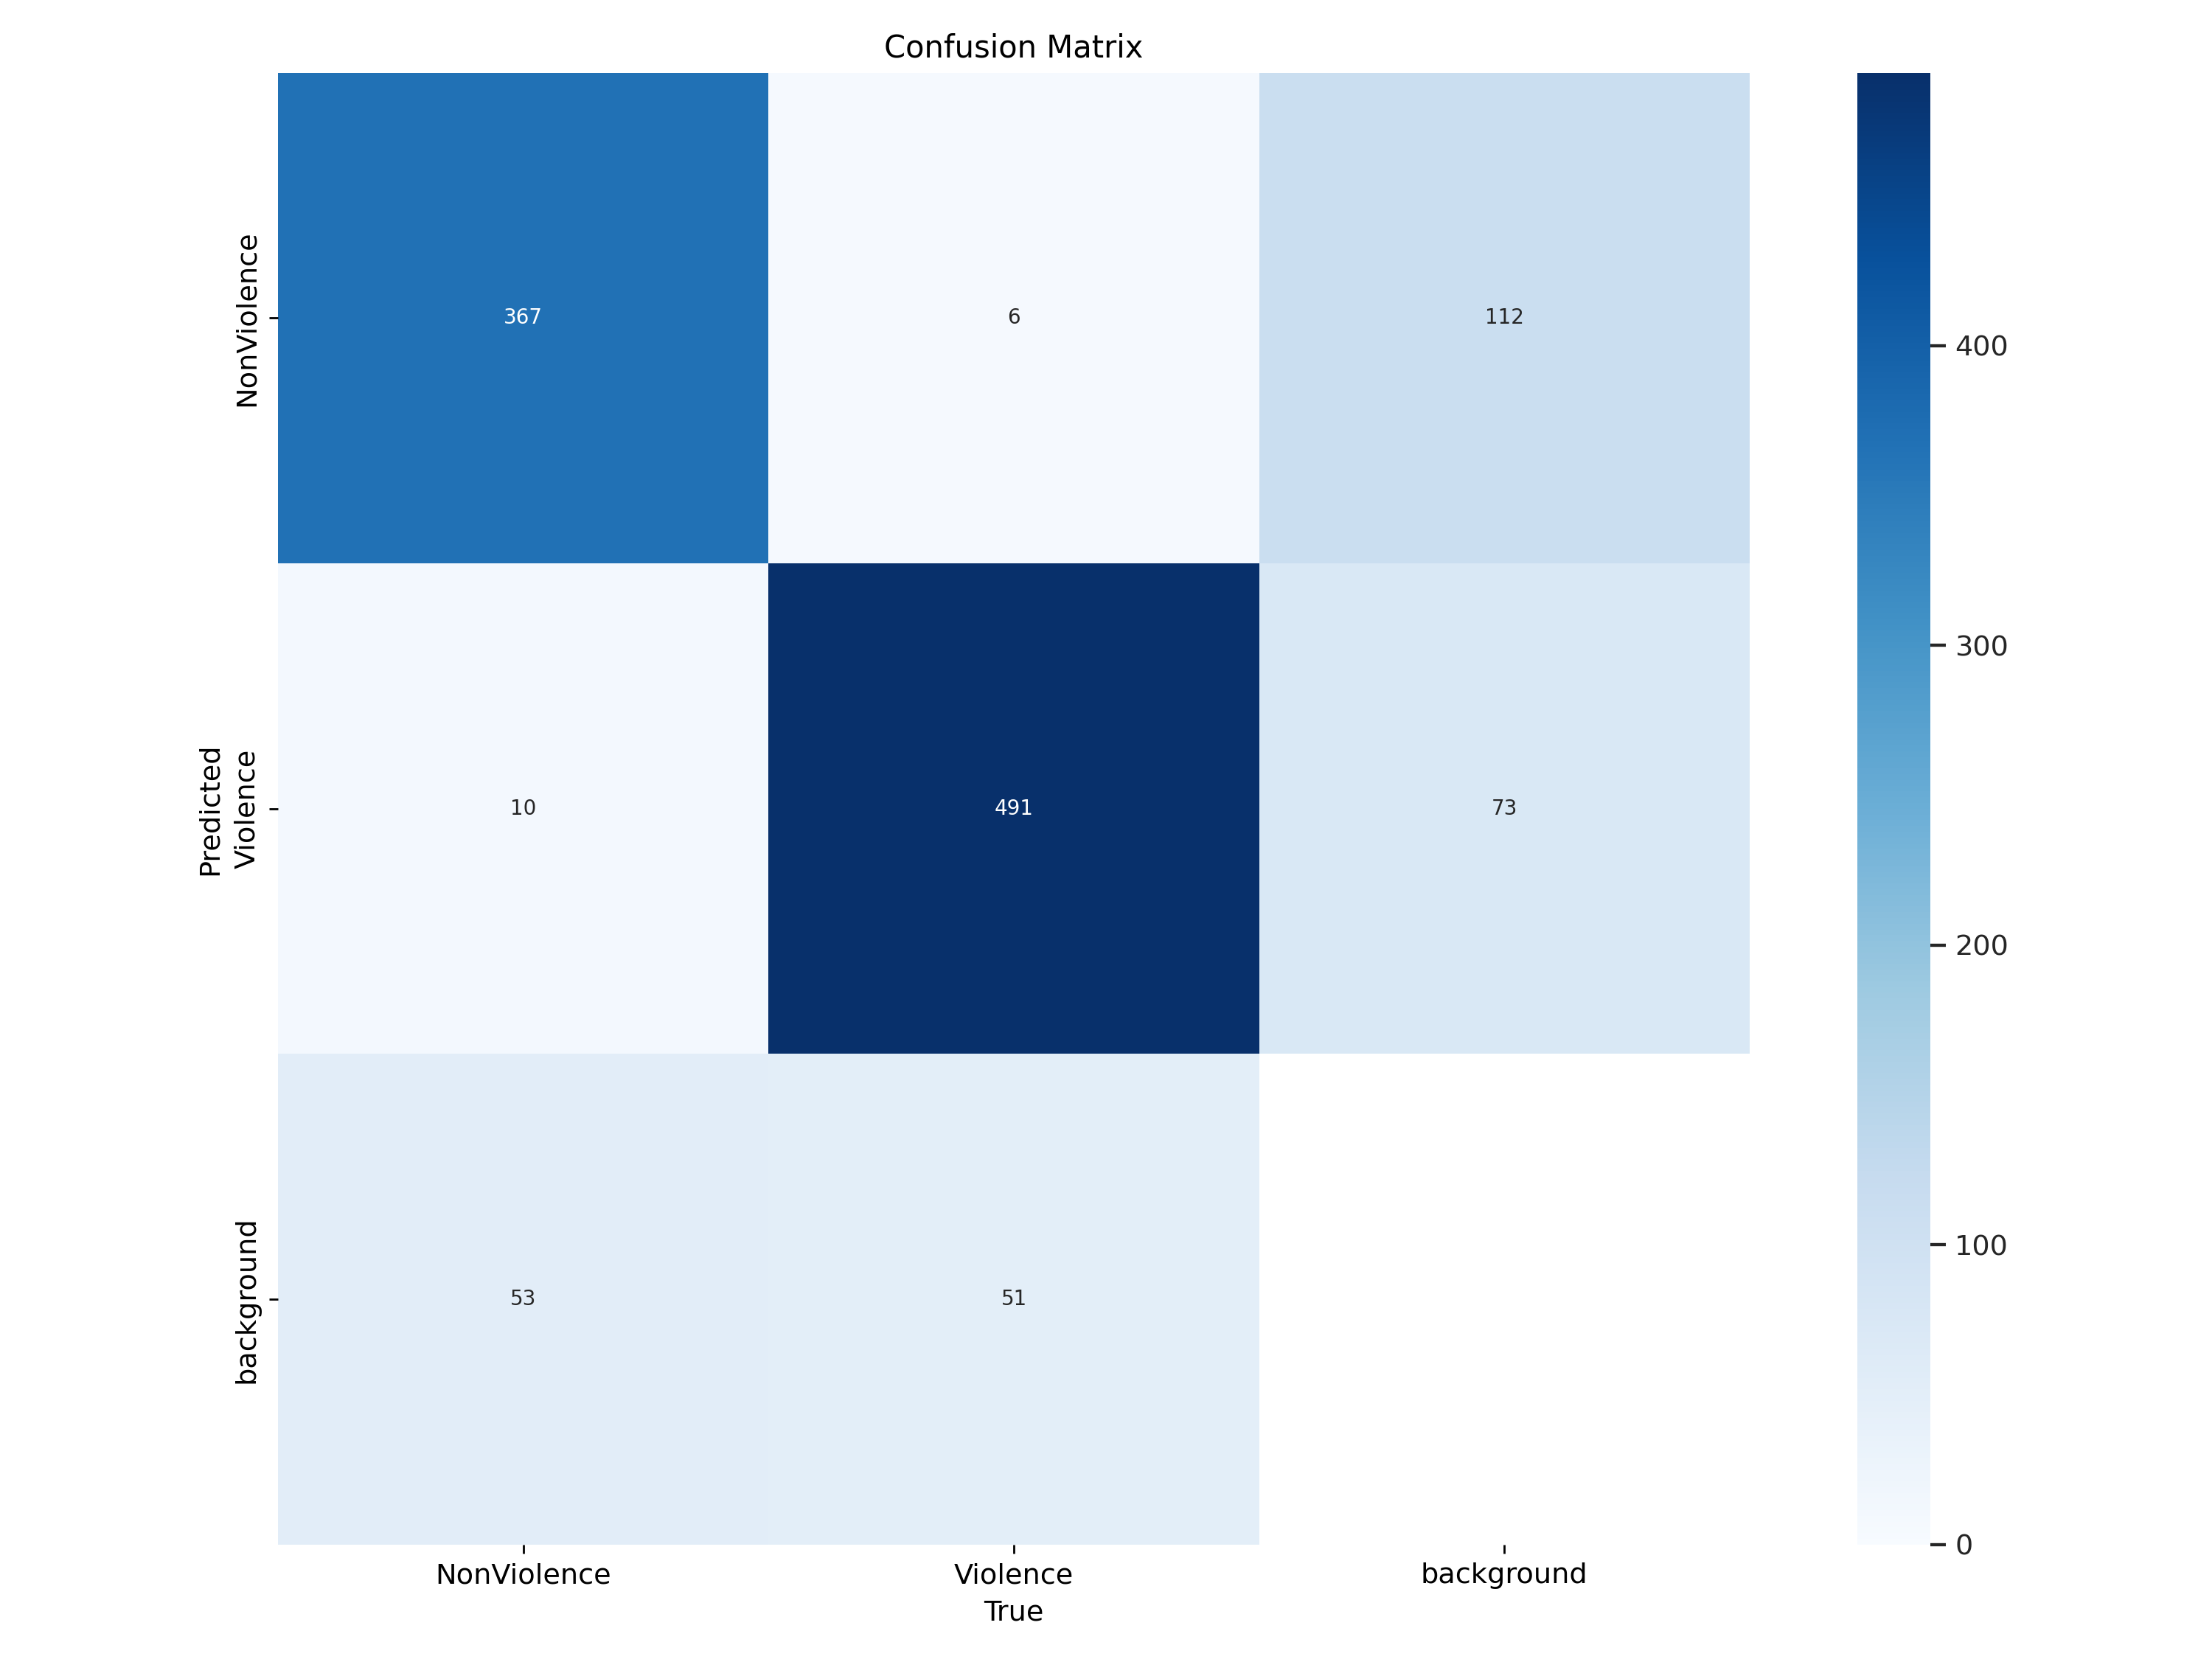

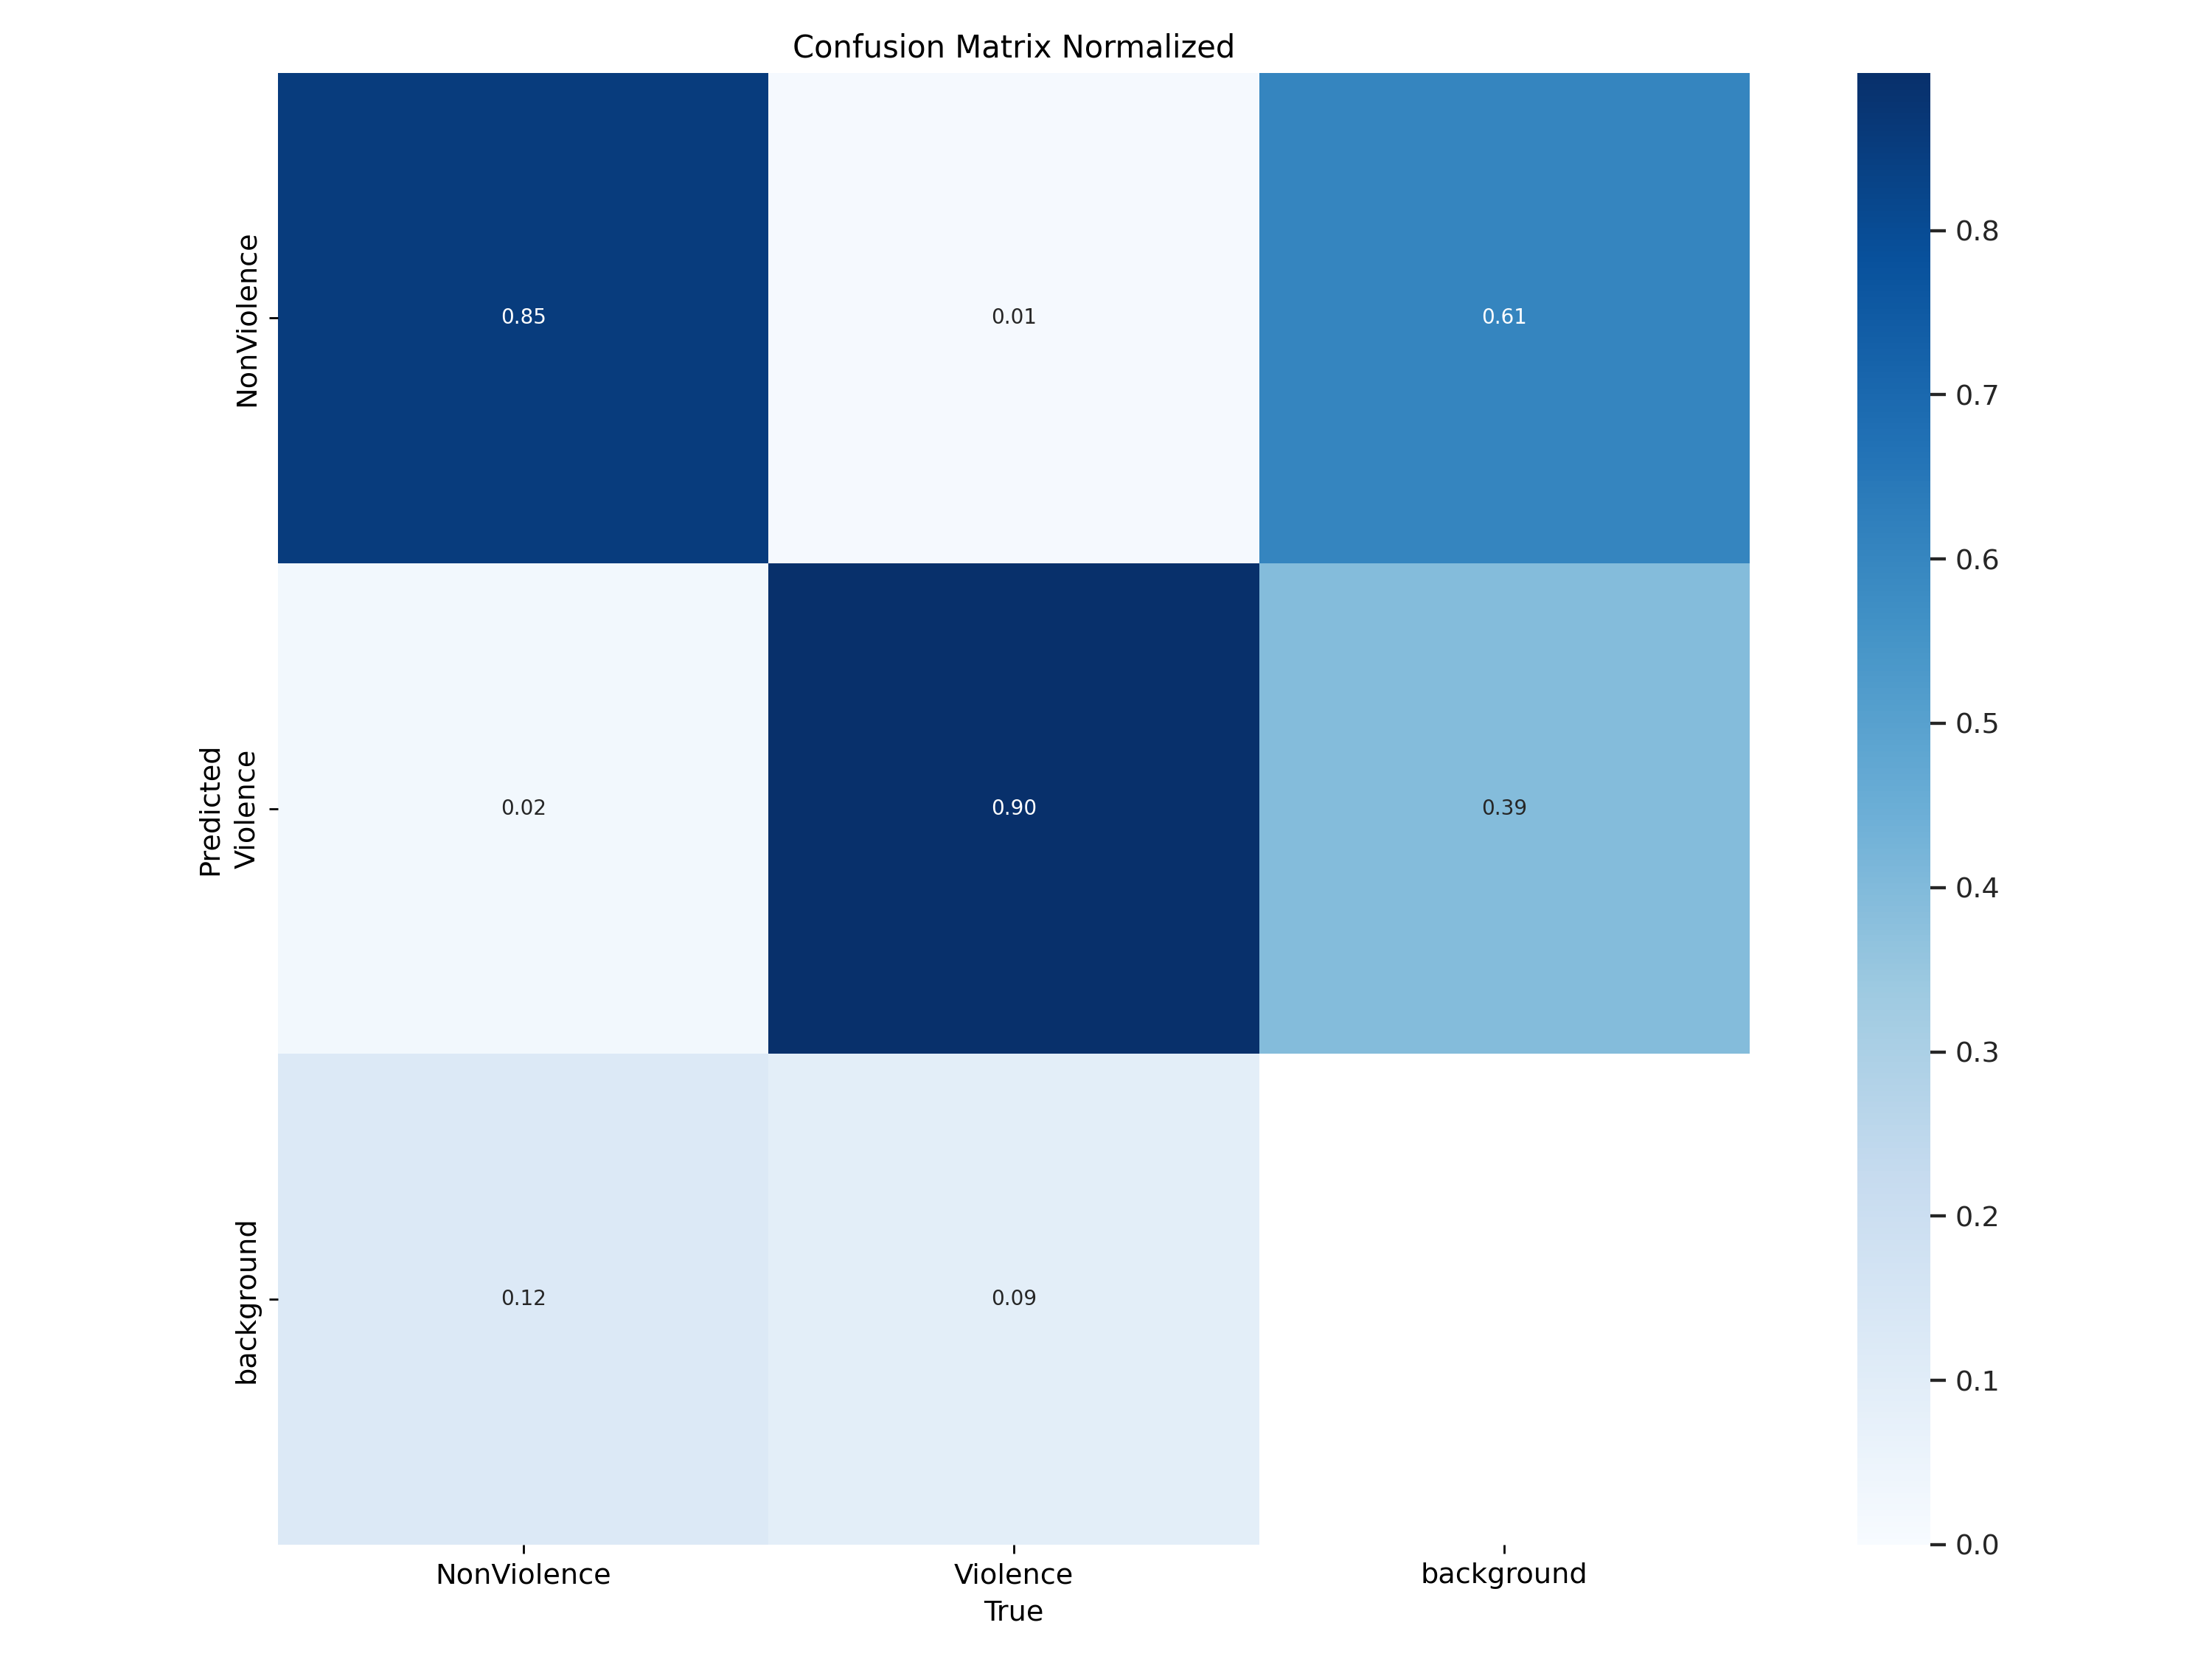

In [ ]:
display(Image(filename='/content/drive/MyDrive/thesis/runs/detect/train3/confusion_matrix.png', width=600) , Image(filename='/content/drive/MyDrive/thesis/runs/detect/train3/confusion_matrix_normalized.png', width=600))

#### F1 Confidence Curve

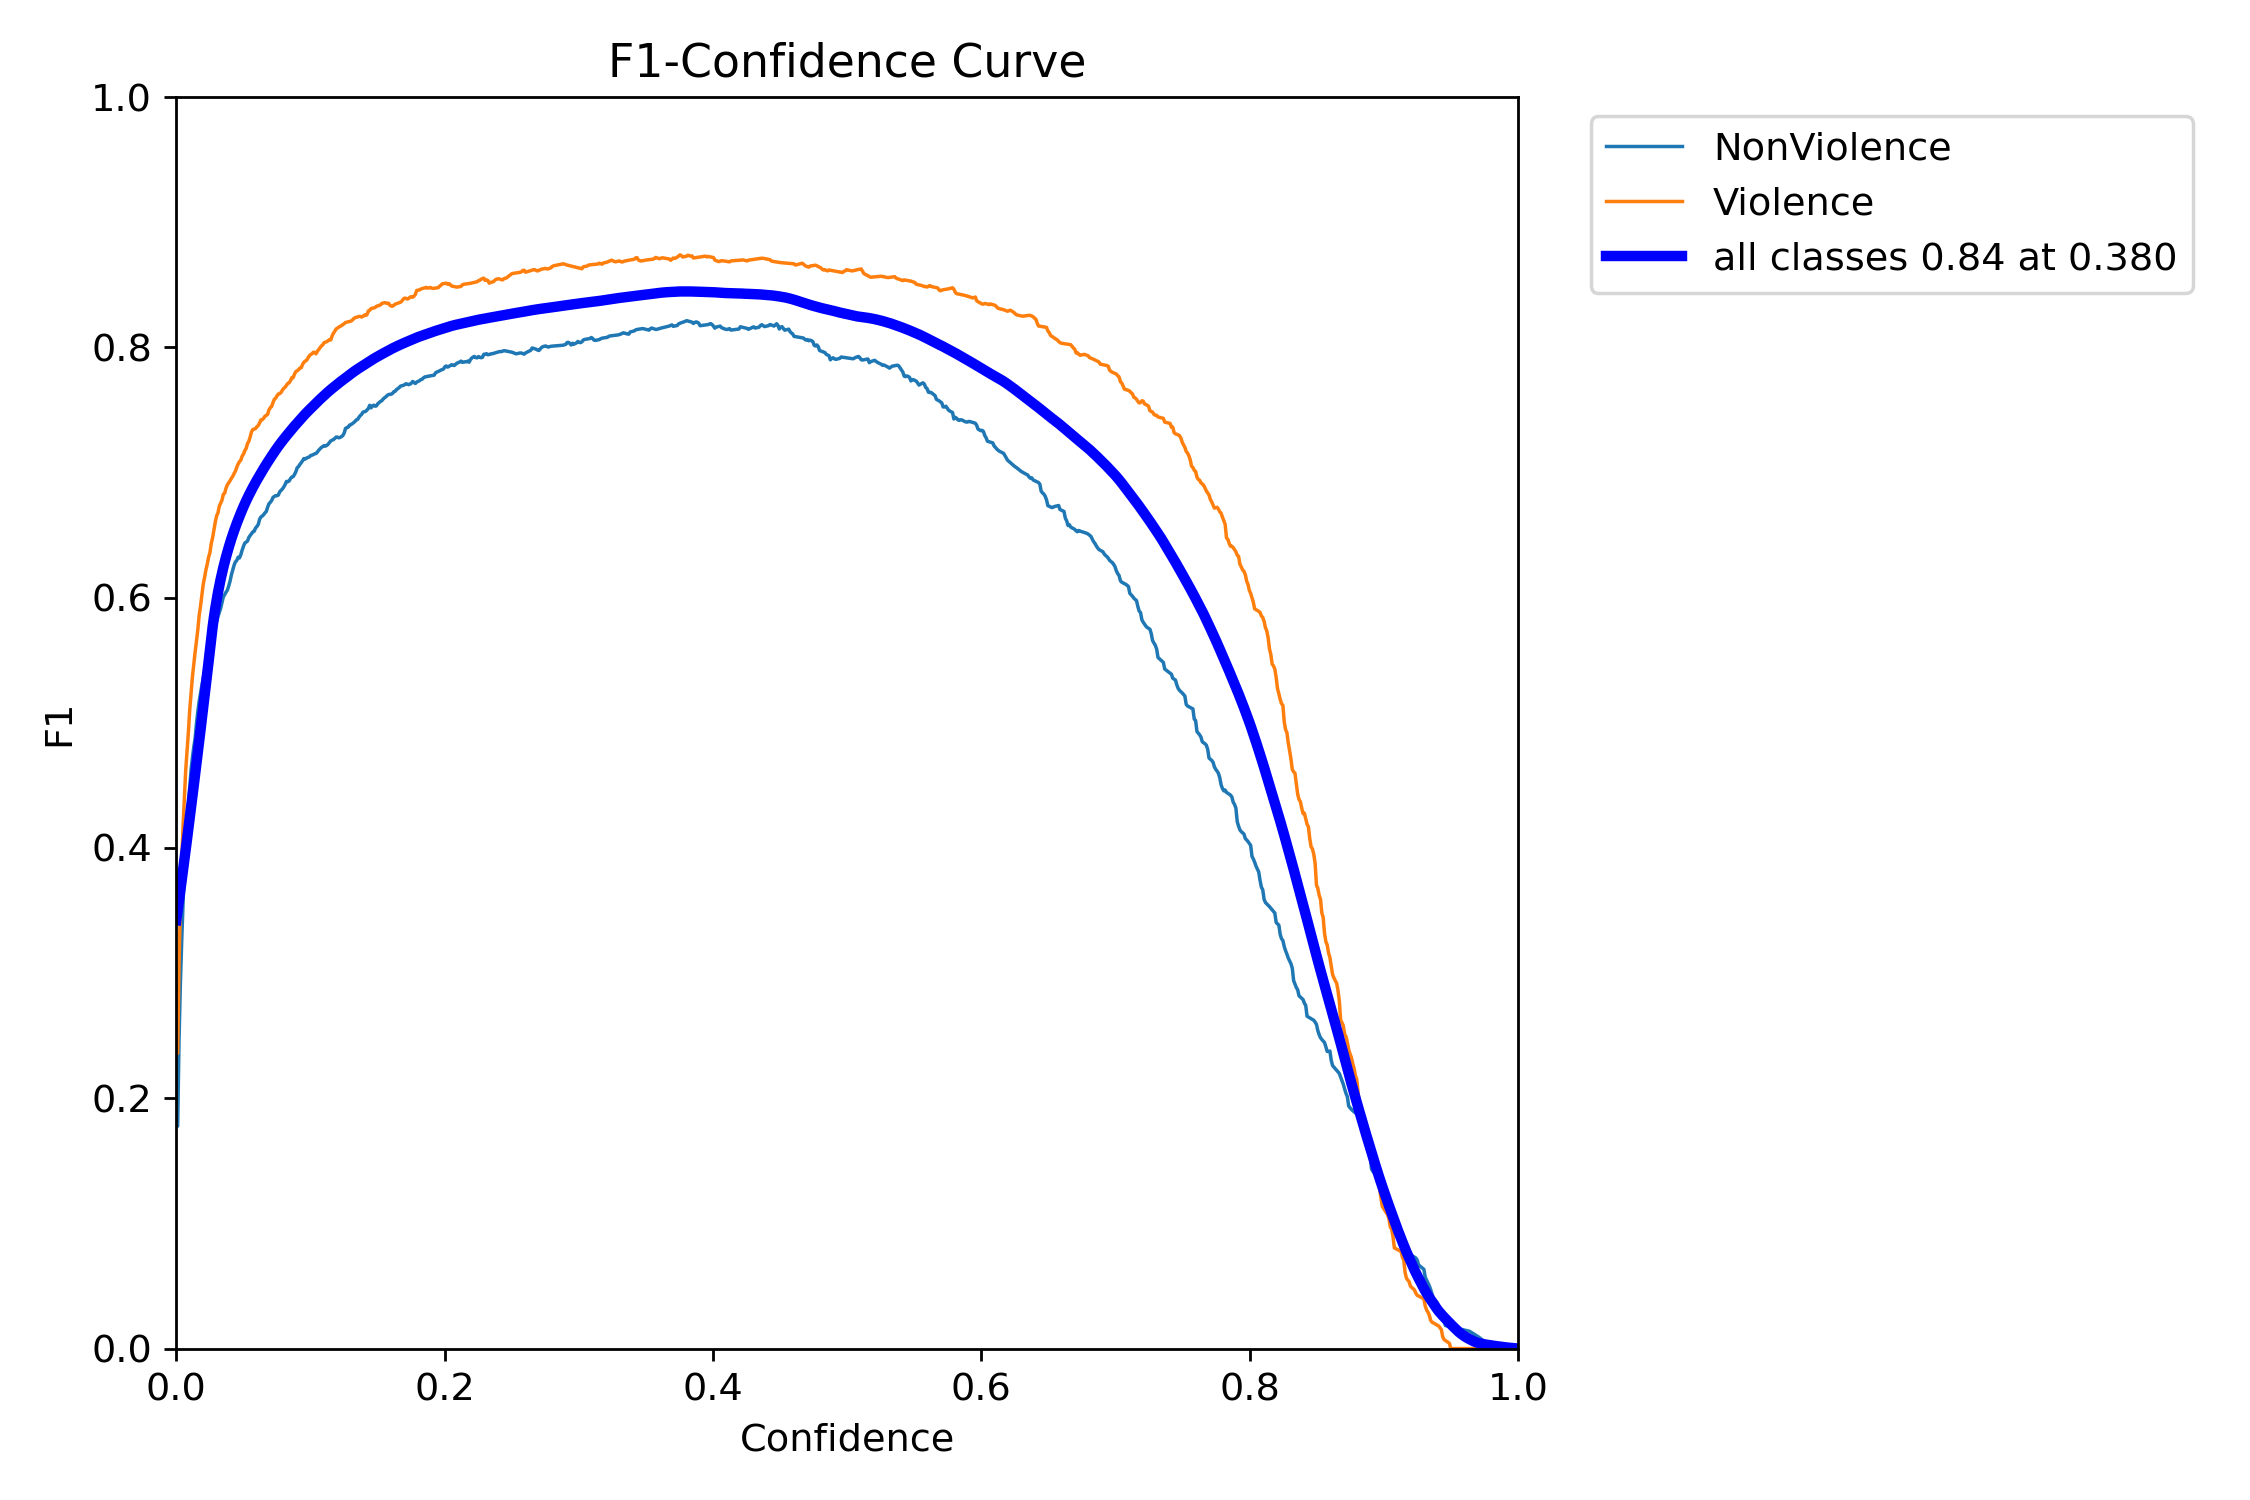

In [ ]:
Image(filename='/content/drive/MyDrive/thesis/runs/detect/train3/F1_curve.png', width=600)


#### Precision Recall Curve

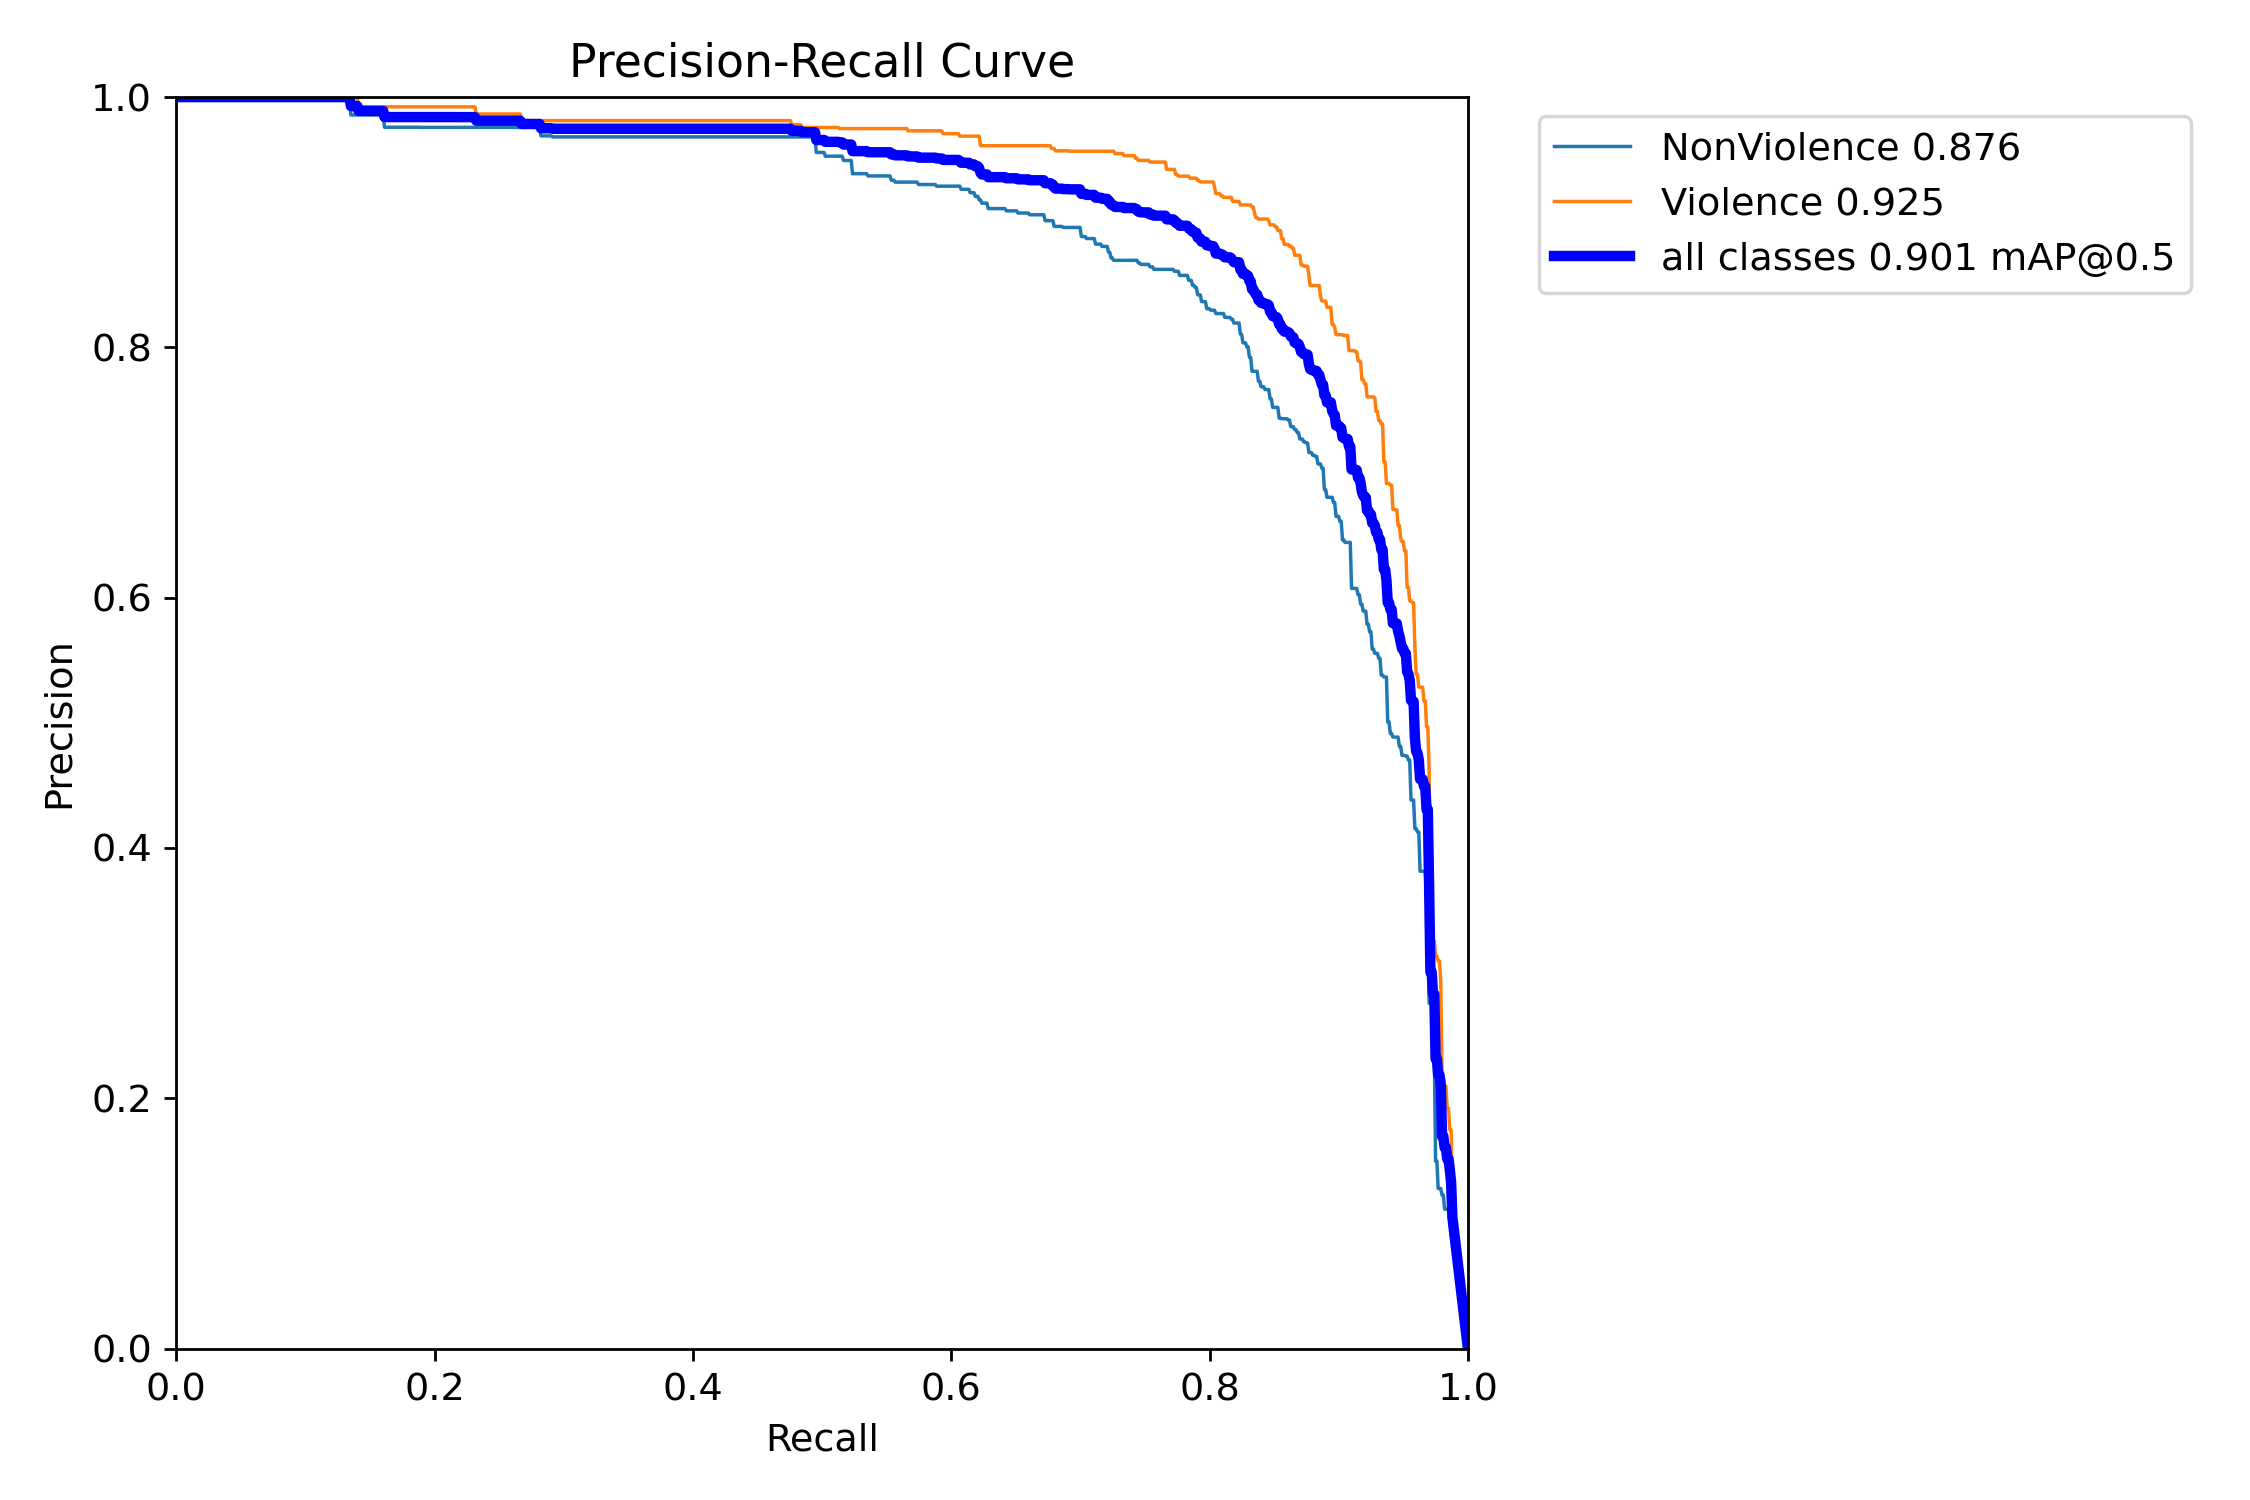

In [ ]:
Image(filename='/content/drive/MyDrive/thesis/runs/detect/train3/PR_curve.png', width=600)

#### Precision Confidence Curve

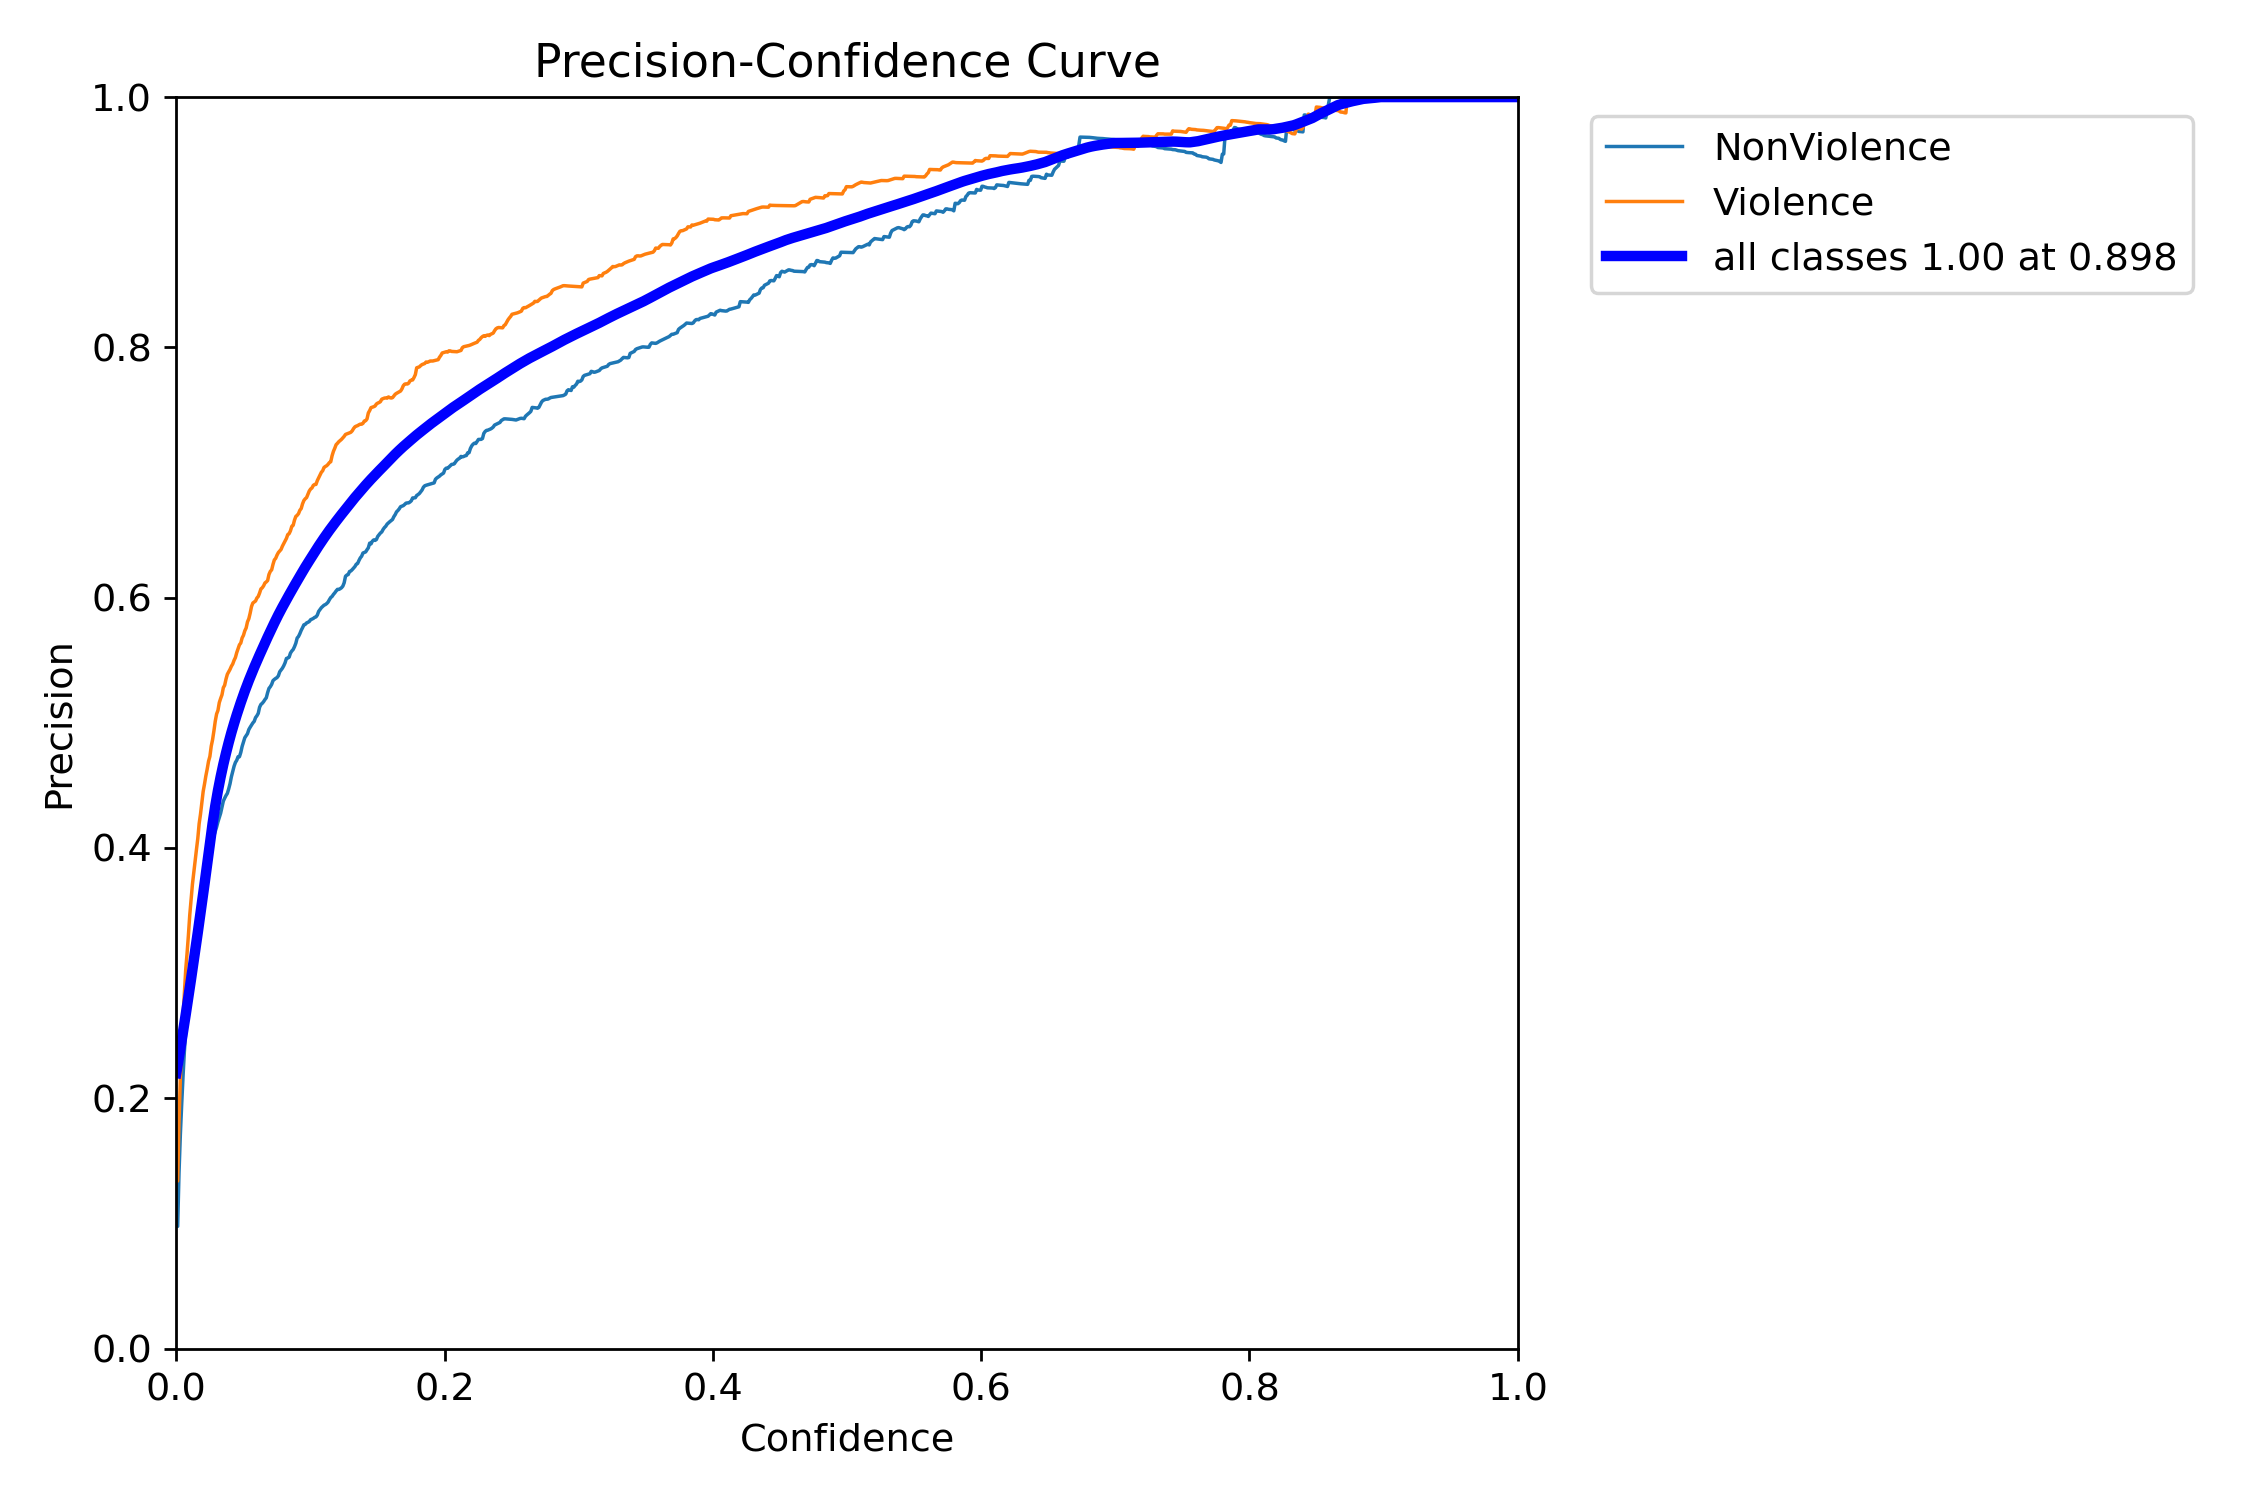

In [ ]:
Image(filename='/content/drive/MyDrive/thesis/runs/detect/train3/P_curve.png', width=600)

#### Recall Confidence Curve

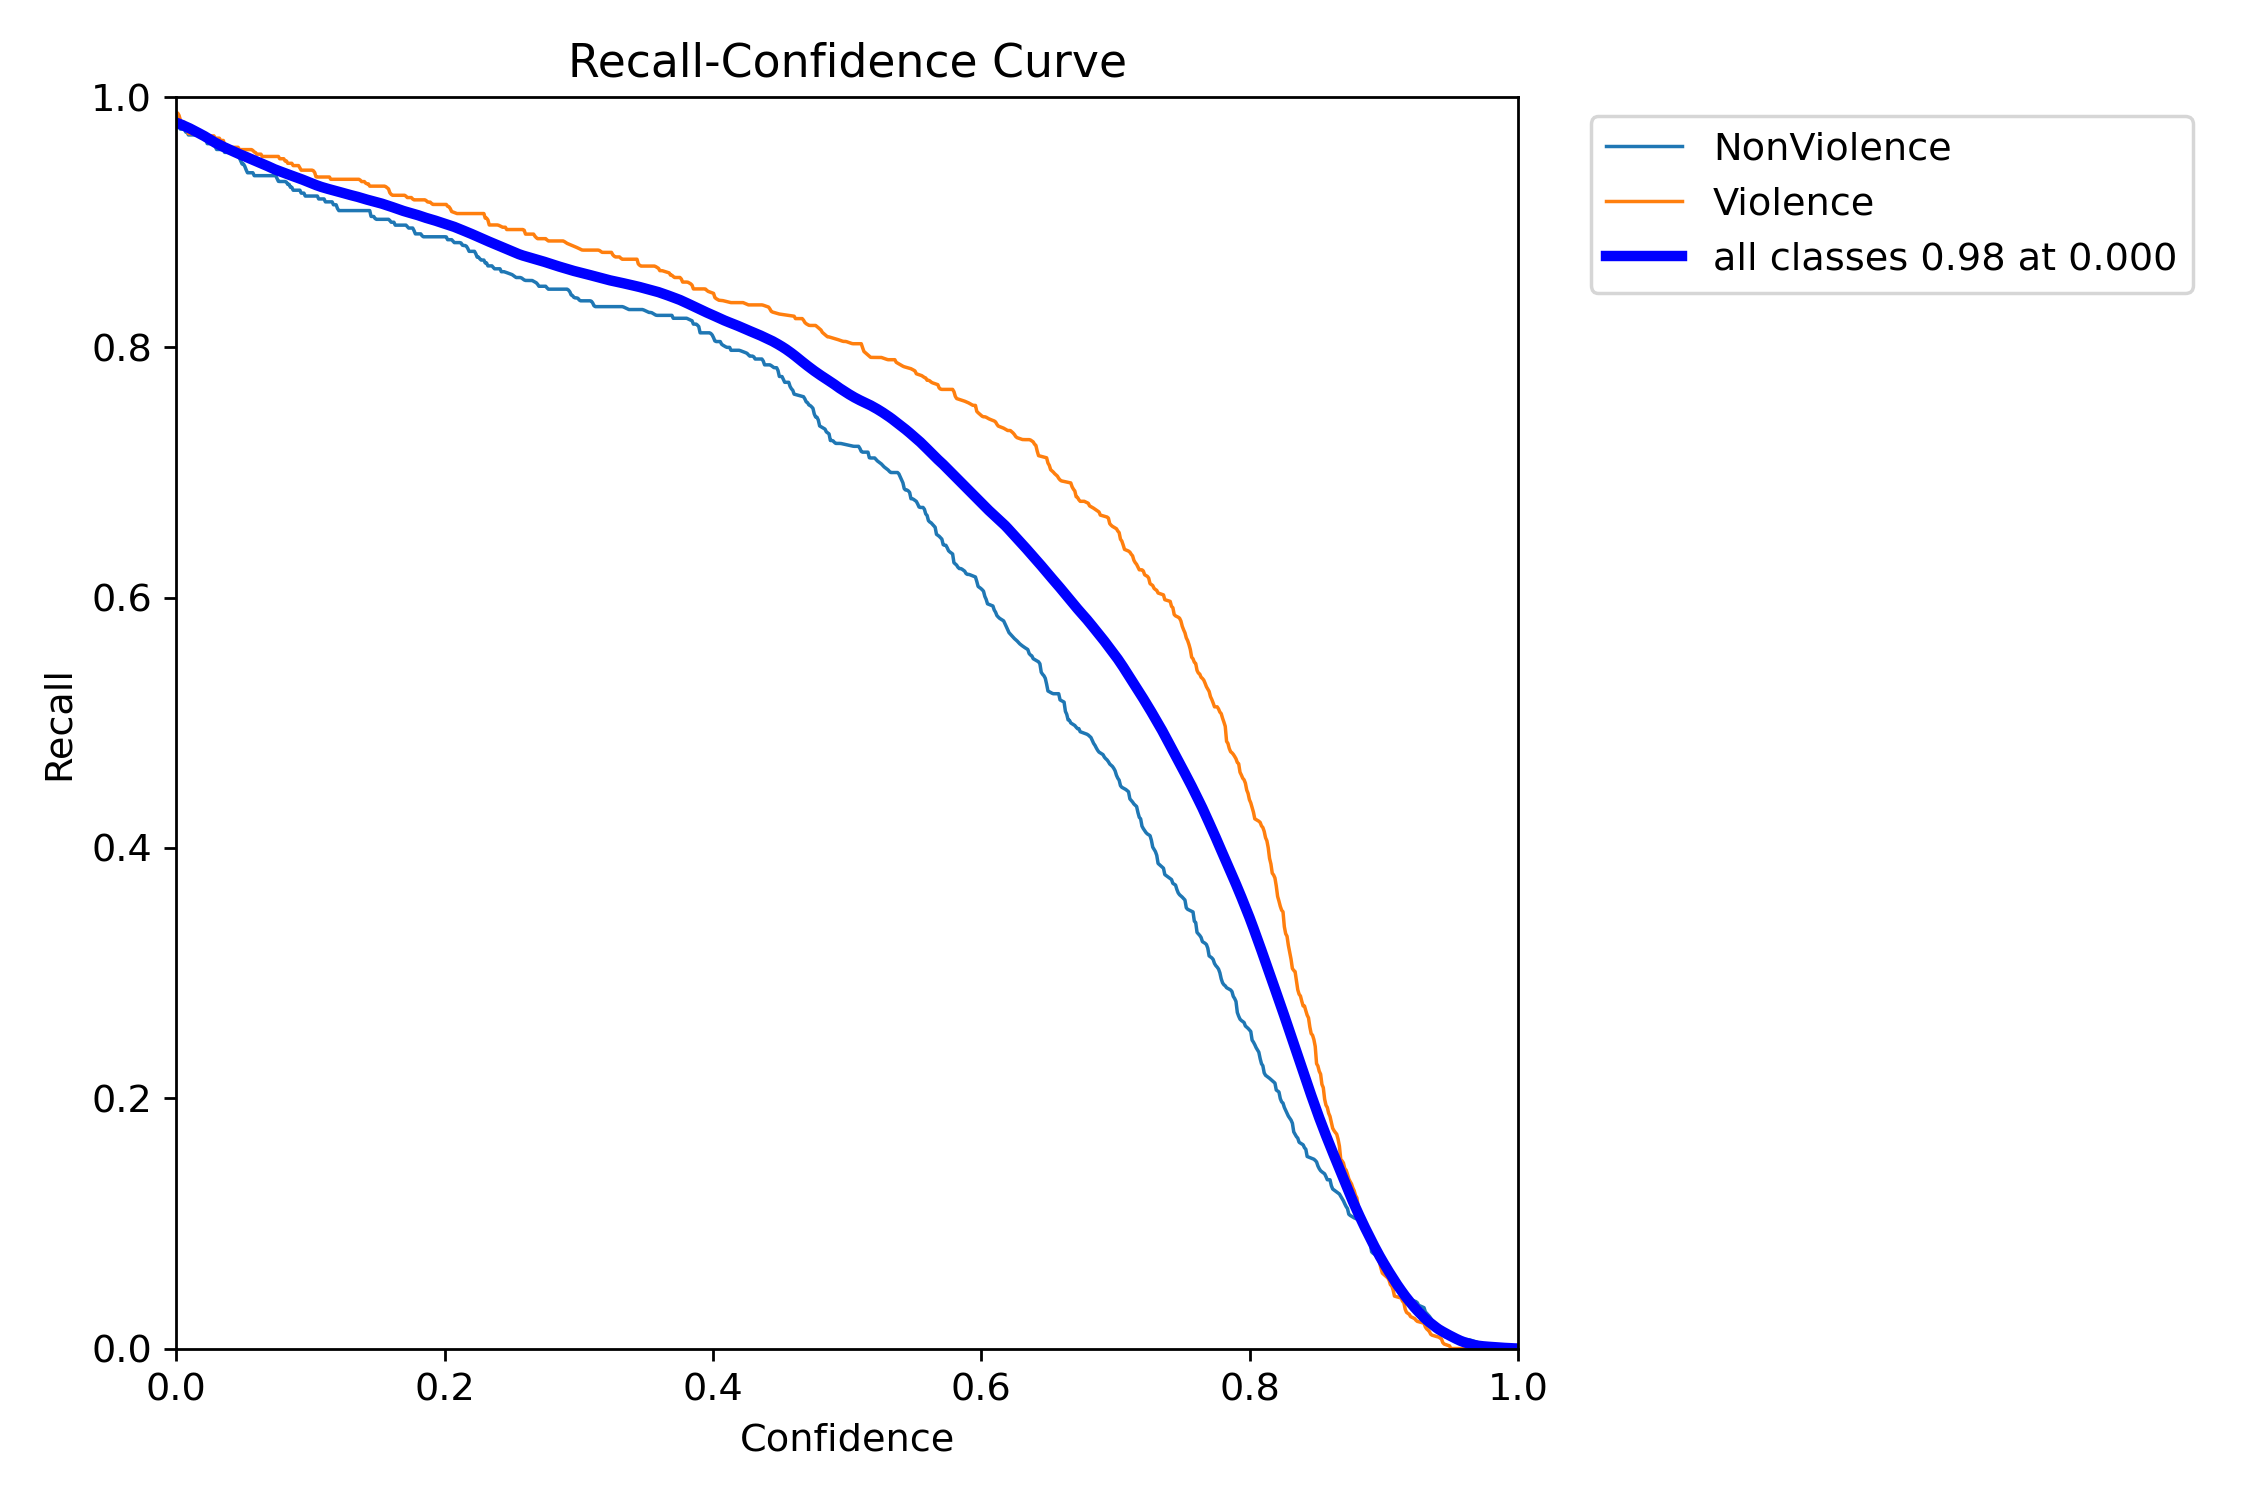

In [ ]:
Image(filename='/content/drive/MyDrive/thesis/runs/detect/train3/R_curve.png', width=600)

#### Training images

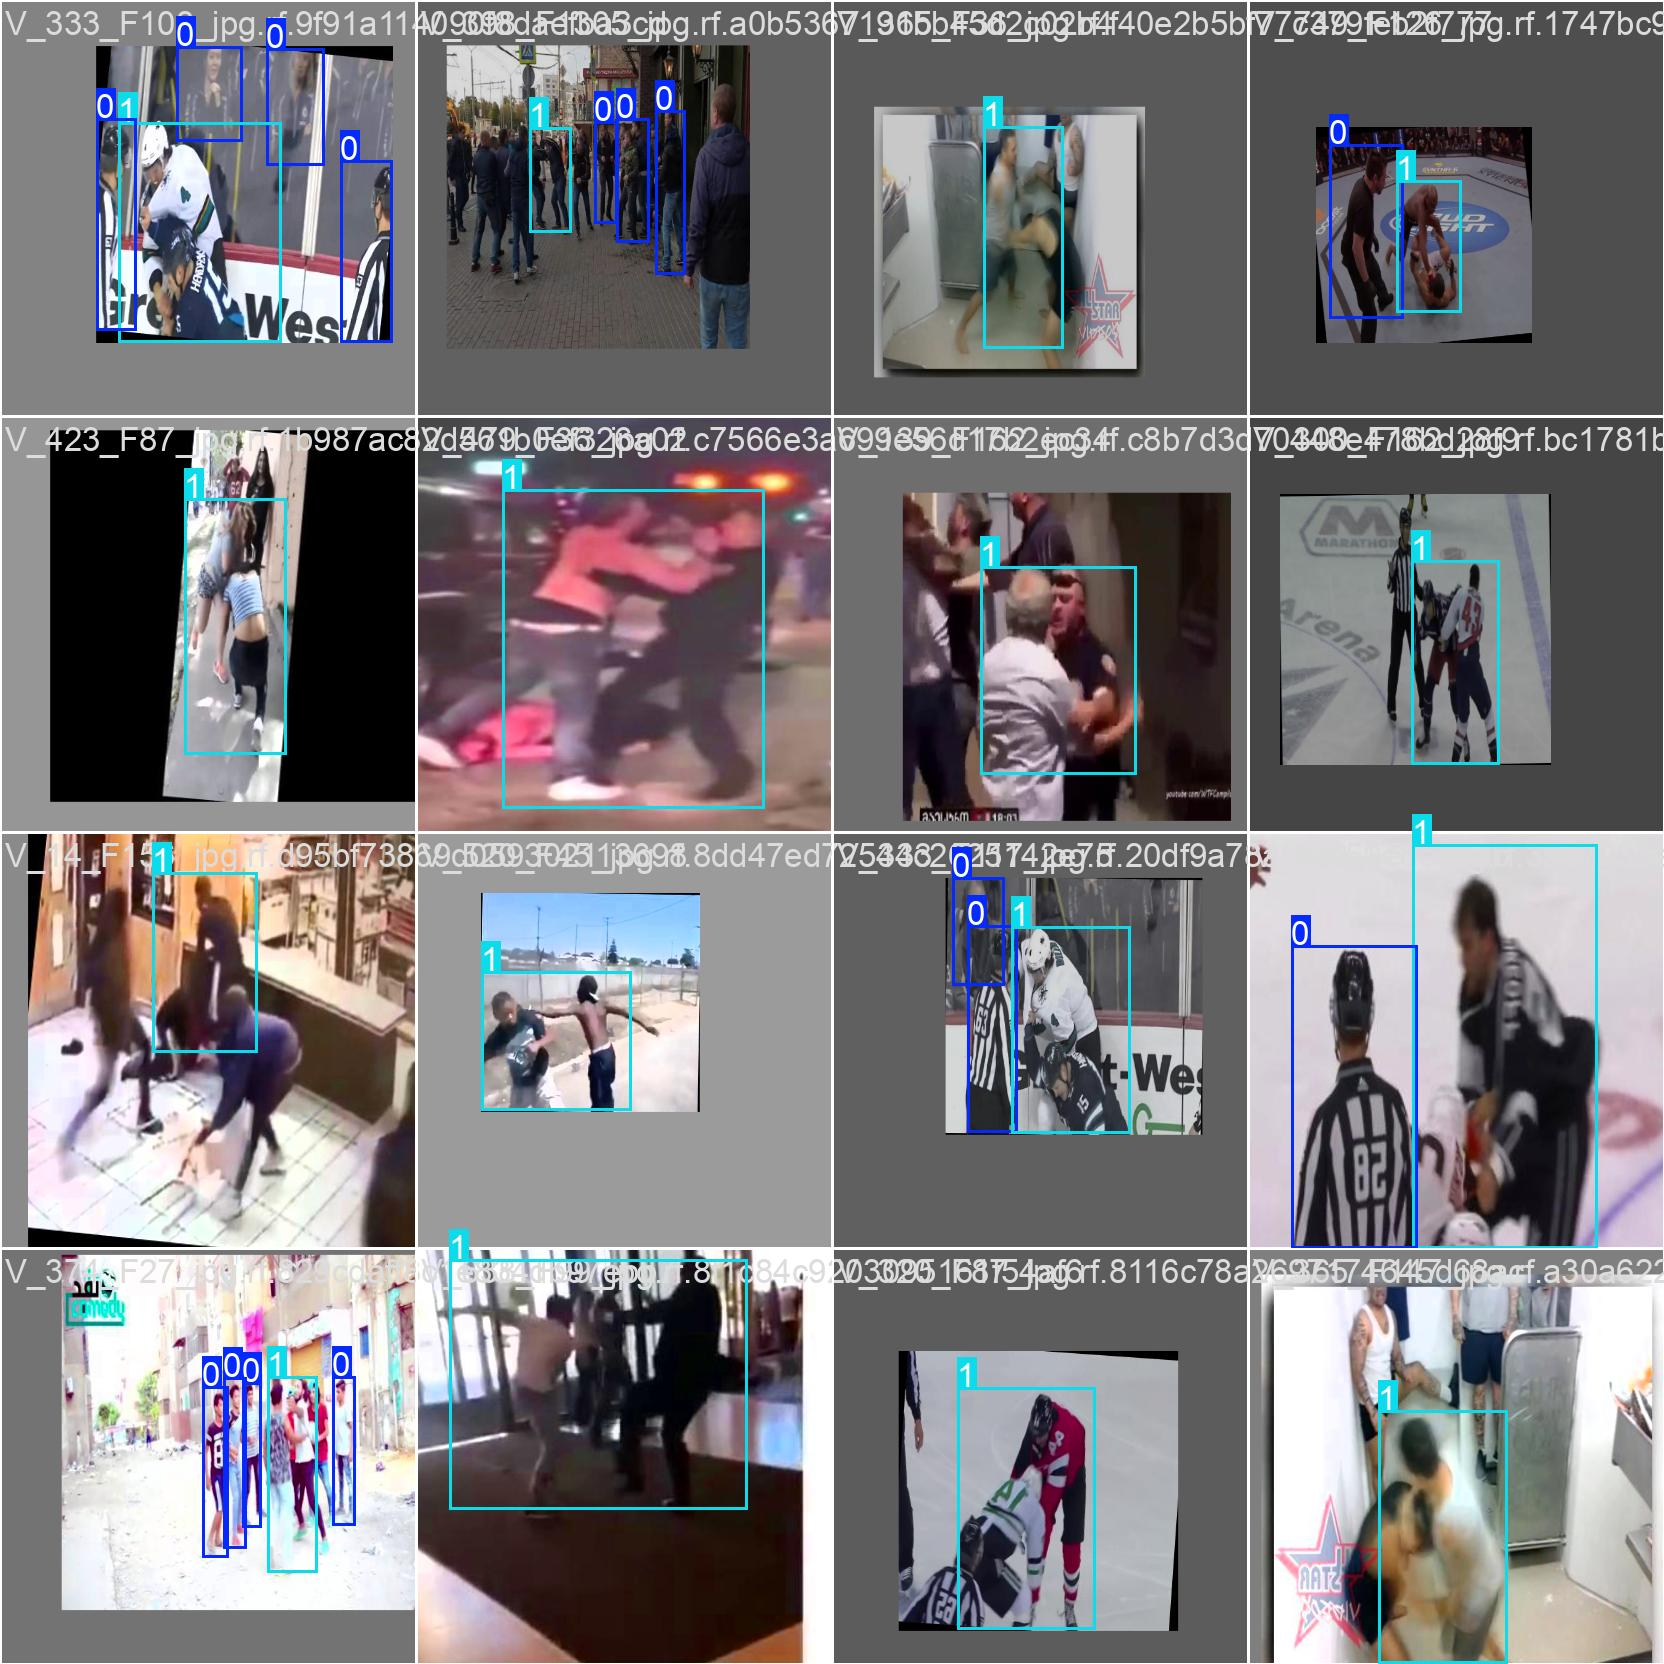

In [ ]:
Image(filename='/content/drive/MyDrive/thesis/runs/detect/train3/train_batch1861.jpg', width=600)

### Validation

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/thesis/runs/detect/train3/weights/best.pt data=data.yaml

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/thesis/Violence-1/valid/labels.cache... 575 images, 0 backgrounds, 0 corrupt: 100% 575/575 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 36/36 [00:06<00:00,  5.59it/s]
                   all        575        978      0.864       0.83      0.901       0.59
           NonViolence        220        430      0.825      0.813      0.876      0.565
              Violence        529        548      0.902      0.847      0.925      0.614
Speed: 0.4ms preprocess, 4.0ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val5
💡 Learn more at https://docs.ultralytics.com/modes/val


### Validation result

#### Confusion matrix

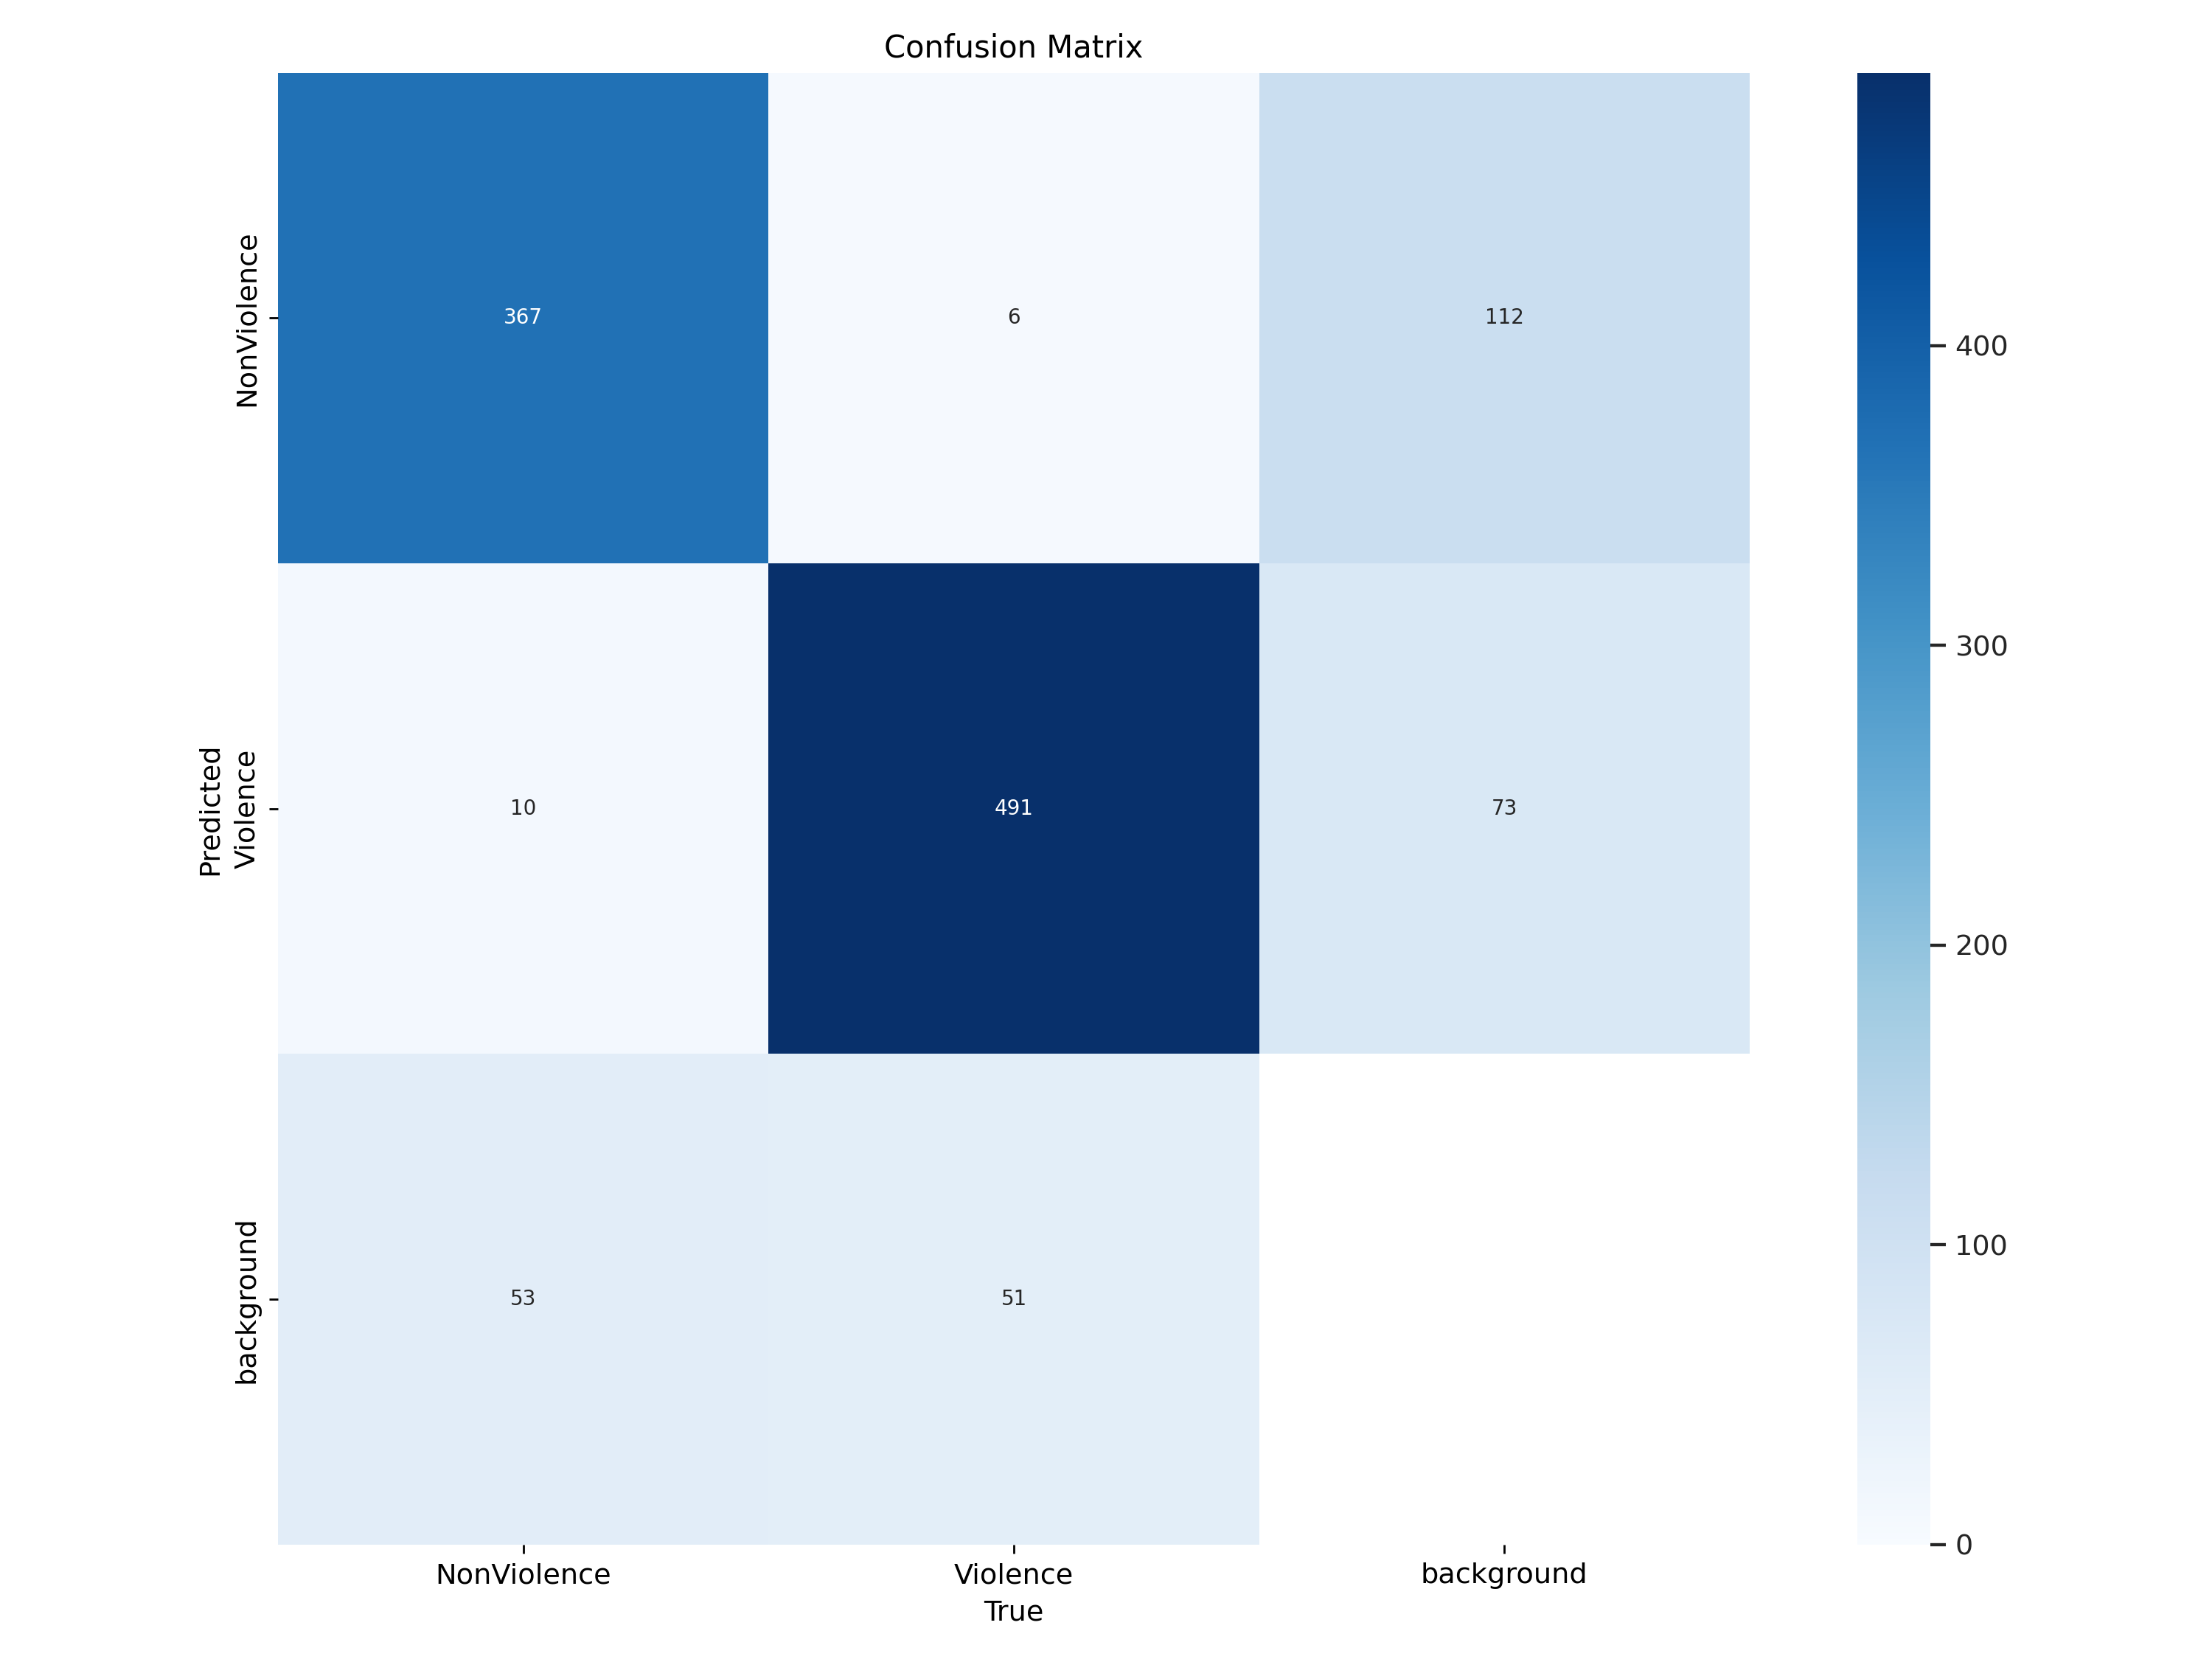

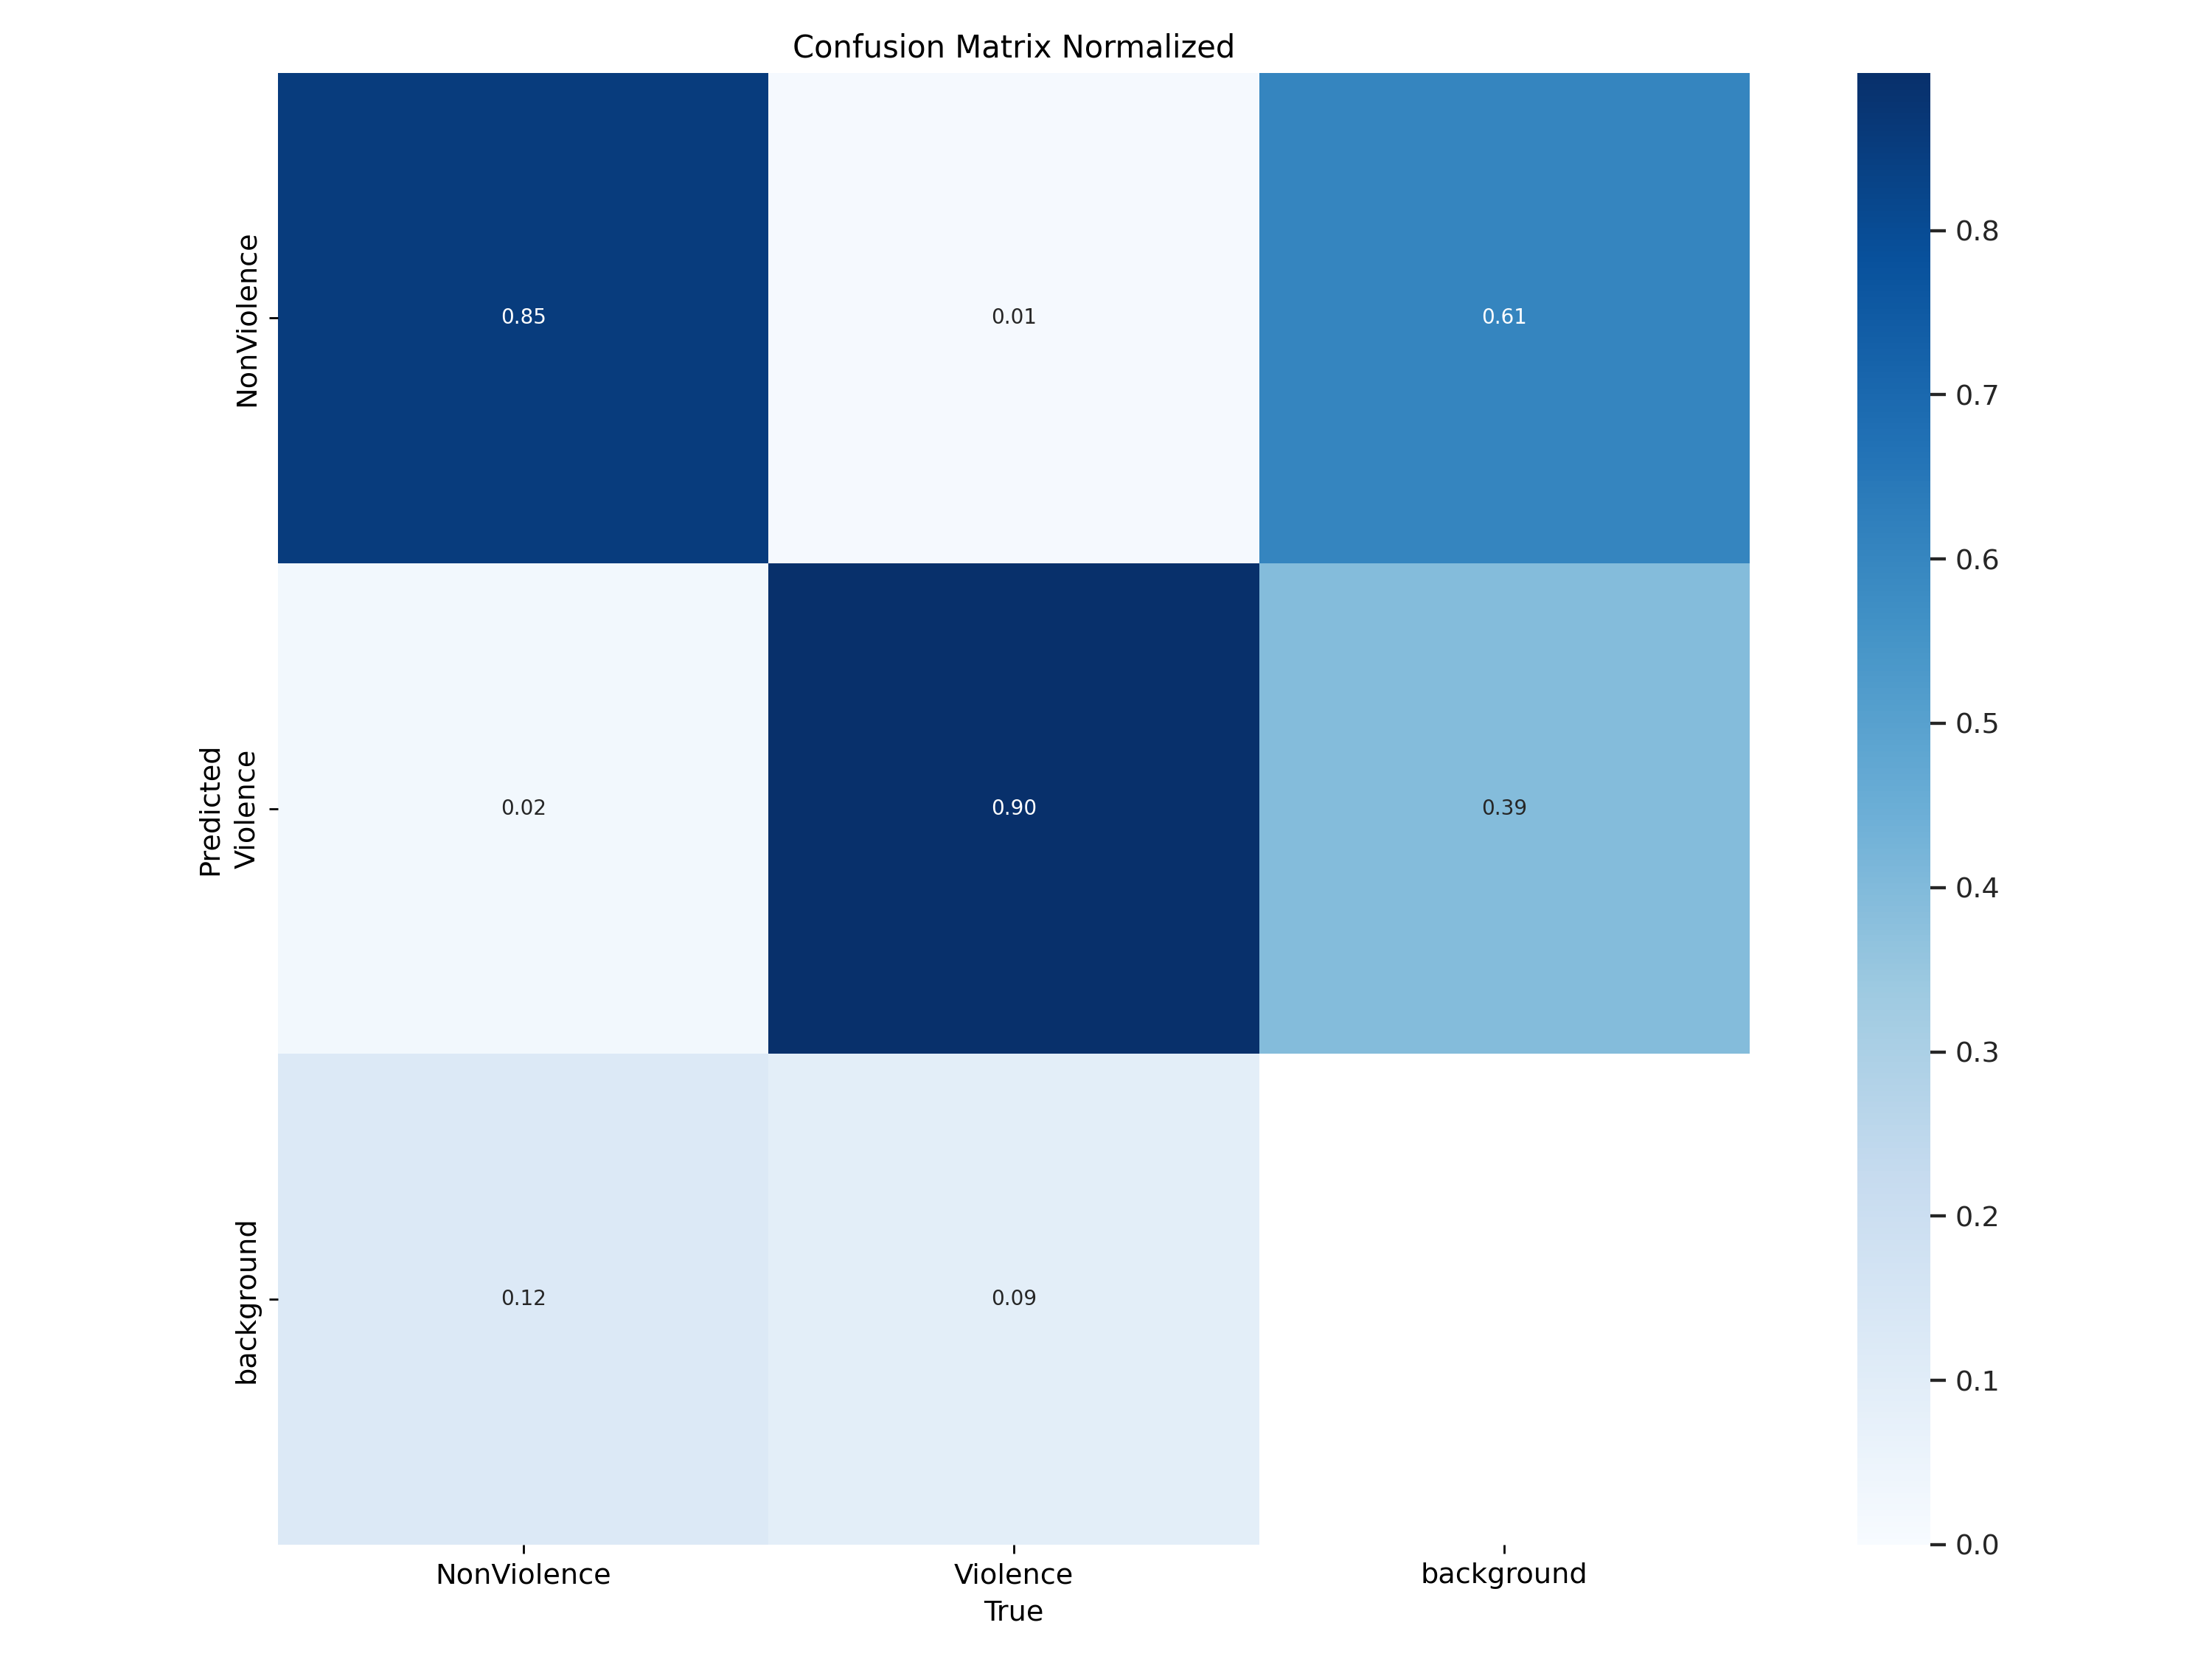

In [ ]:
display(Image(filename='/content/drive/MyDrive/thesis/runs/detect/val4/confusion_matrix.png', width=600) , Image(filename='/content/drive/MyDrive/thesis/runs/detect/val4/confusion_matrix_normalized.png', width=600))

#### Validation images

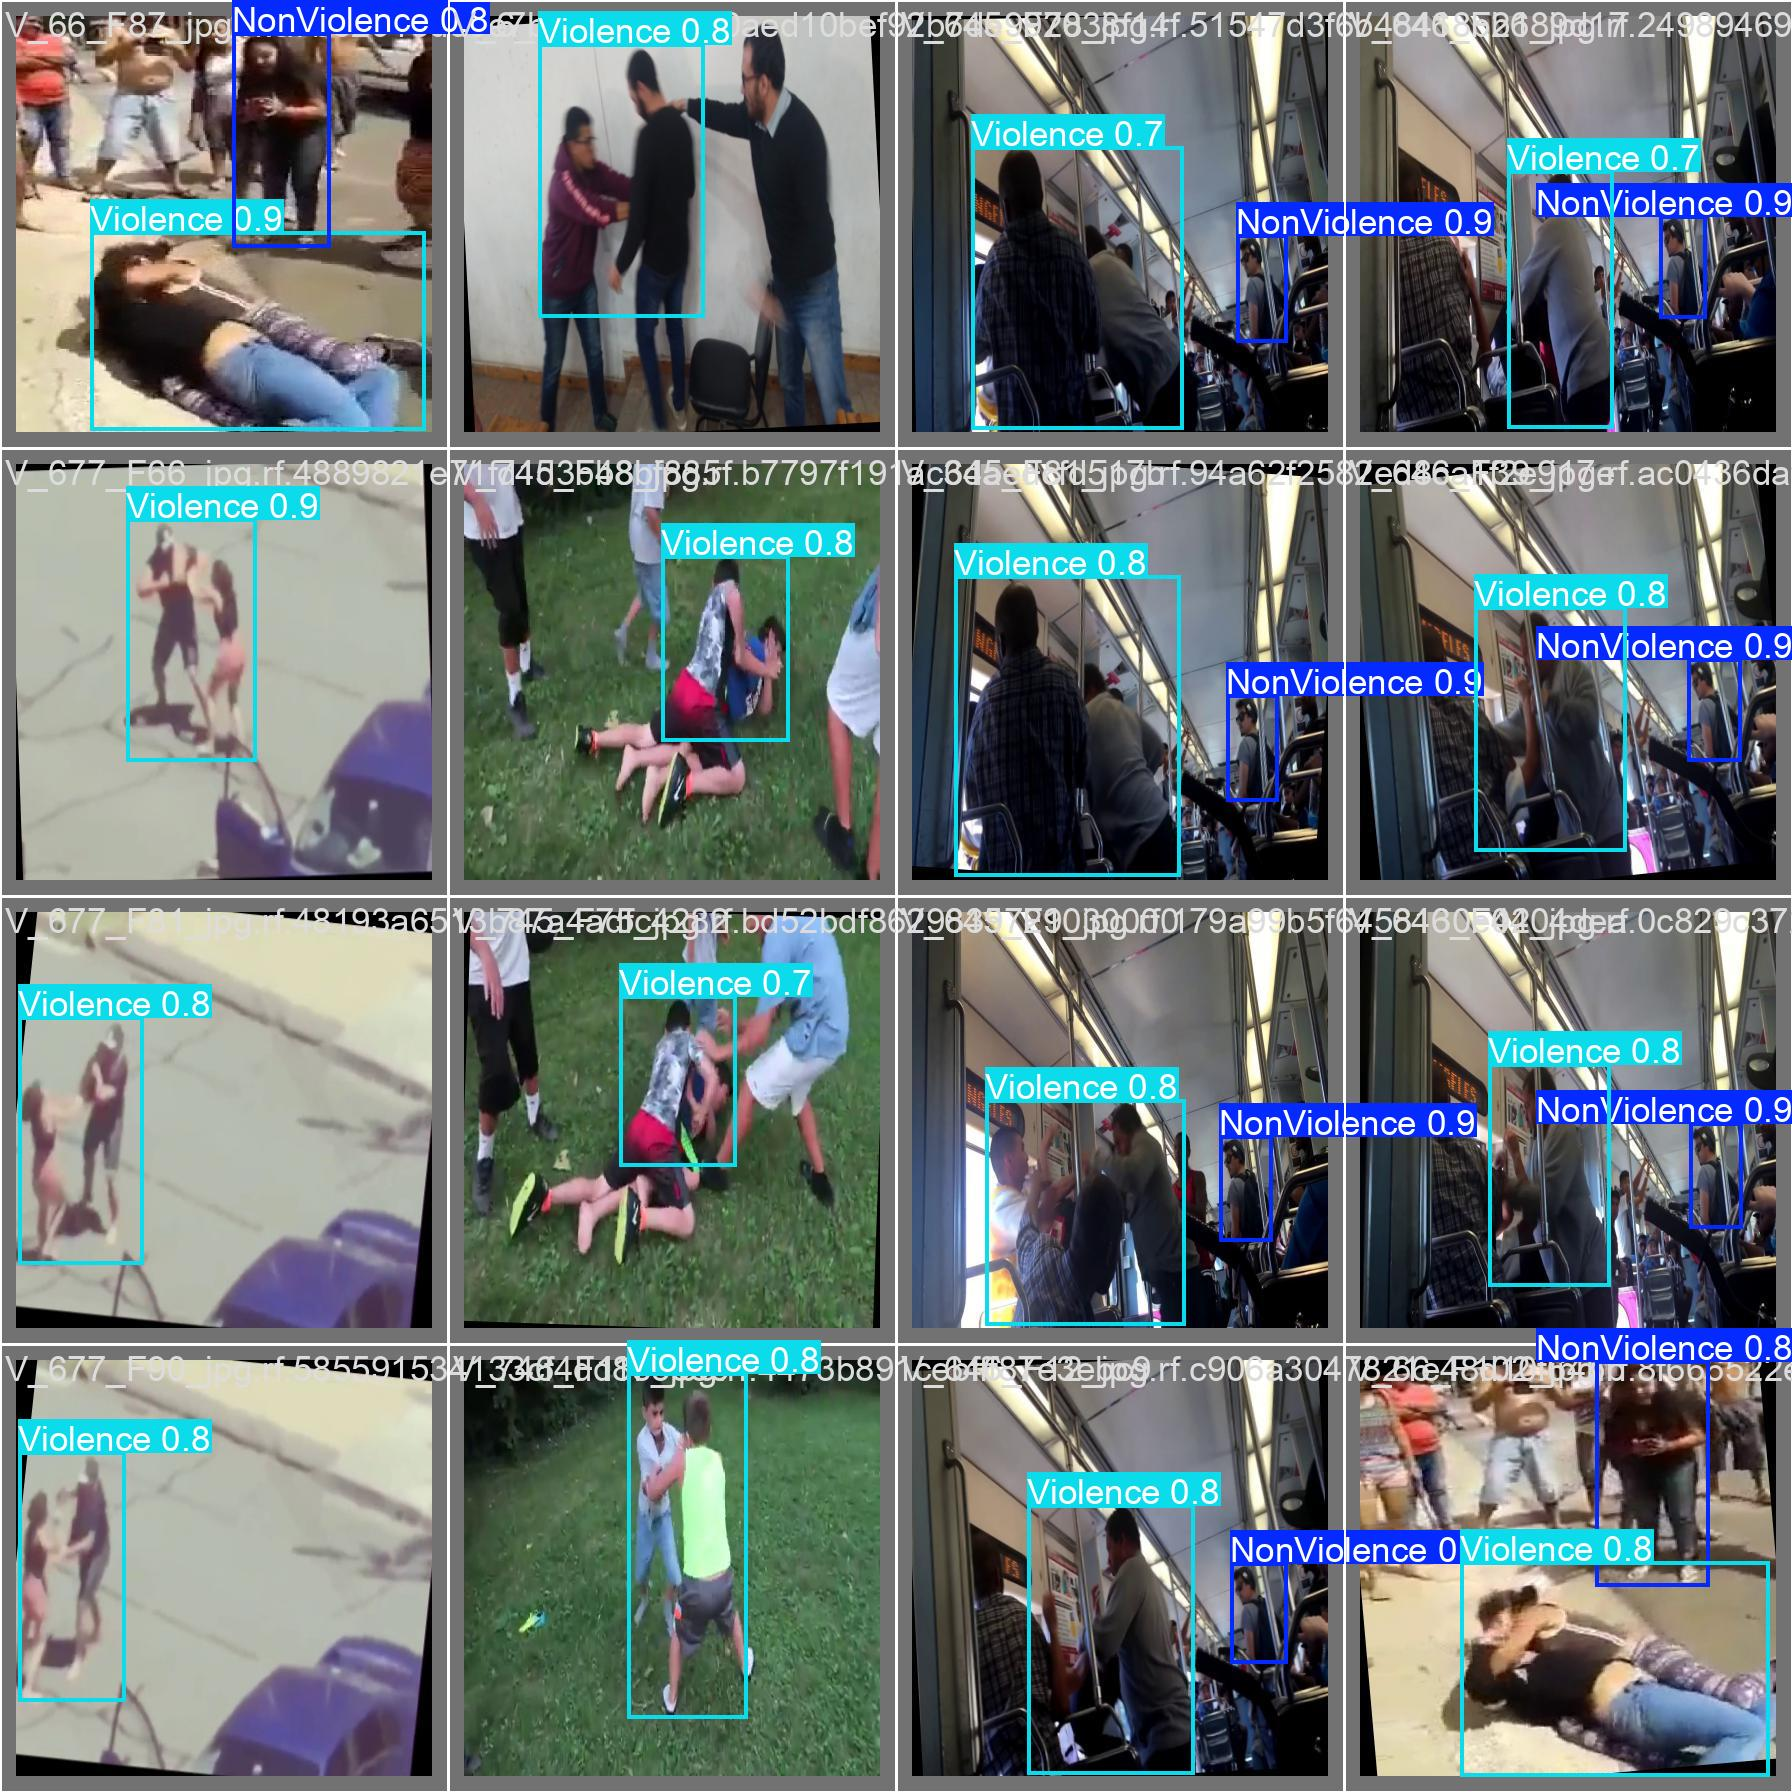

In [ ]:
Image(filename='/content/drive/MyDrive/thesis/runs/detect/val4/val_batch0_pred.jpg', width=600)

### Predict on test data (images)

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/thesis/runs/detect/train3/weights/best.pt conf=0.25 source=/content/drive/MyDrive/thesis/Violence-1/test/images

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/290 /content/drive/MyDrive/thesis/Violence-1/test/images/NV_118_F44_jpg.rf.53f9248d0de24bb3b608bdc4cce78bd4.jpg: 416x416 1 NonViolence, 15.2ms
image 2/290 /content/drive/MyDrive/thesis/Violence-1/test/images/NV_118_F72_jpg.rf.8e0cf97451cba97e942718e6b5021bb9.jpg: 416x416 1 NonViolence, 10.2ms
image 3/290 /content/drive/MyDrive/thesis/Violence-1/test/images/NV_137_F100_jpg.rf.b9ffa3cd0ec141ba4a5b1e23203f6301.jpg: 416x416 1 NonViolence, 10.1ms
image 4/290 /content/drive/MyDrive/thesis/Violence-1/test/images/NV_140_F24_jpg.rf.67bf6a0891129ef0fc5bf8a922da32a8.jpg: 416x416 (no detections), 10.1ms
image 5/290 /content/drive/MyDrive/thesis/Violence-1/test/images/NV_140_F28_jpg.rf.52aef7839c94aadc0f1830e207c8c2ee.jpg: 416x416 1 NonViolence, 10.1ms
image 6/290 /content/drive/MyDrive/thesis/Violence-1/test/images/NV_21_F100_

#### Predicted images

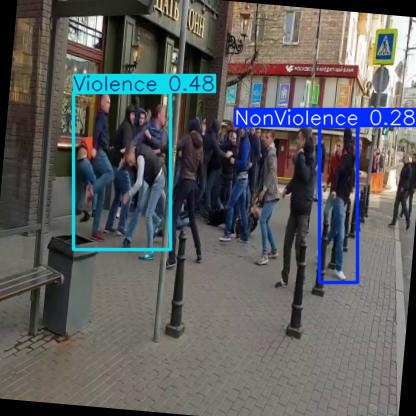

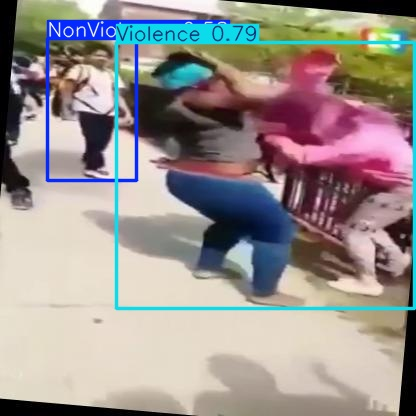

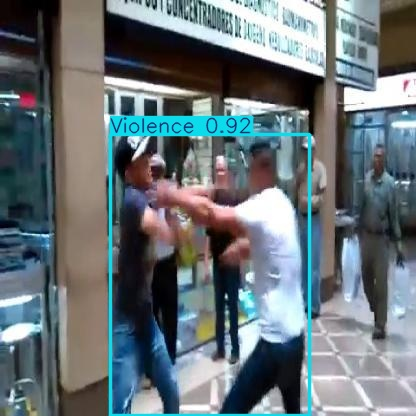

In [ ]:
import glob
import random
from IPython.display import Image, display

# Get the list of all image paths in the directory
image_paths = glob.glob('/content/drive/MyDrive/thesis/runs/detect/predict/*.jpg')

# Randomly select three image paths from the list
random_image_paths = random.sample(image_paths, 3)

# Display the three randomly selected images
for image_path in random_image_paths:
    display(Image(filename=image_path, width=416))
    print("\n")

### Predict on test data (Videos)

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/thesis/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/thesis/dataset/mixed_videos

In [ ]:
!cp "/content/drive/MyDrive/thesis/runs/detect/train4/weights/best.pt" .


In [ ]:
from google.colab import files
files.download('best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>